# Метод (алгоритм) k-ближайших соседей
Английское название: k-nearest neighbors (k-NN или kNN или KNN).

### Краткое описание метода
- Значение целевого признака определяется на основе значений целевых признаков тех объектов, которые находятся ближе всего к искомому объекту в пространстве признаков. Один из наиболее простых методов.

- Исторически является одним из наиболее известных методов. В терминологии Data Mining рассматривался как основной алгоритм поиска по прецедентам.

- Указать автора алгоритма довольно сложно. В статье http://37steps.com/4370/nn-rule-invention/ отмечается что метод был предложен много раз в различных вариантах. 

- Метод может использоваться как для классификации, так и для регресии.

- Как правило, метод k-NN показывает худшее качество, по сравнению с другими, более сложными методами.

## Постановка задачи
Пусть дана обучающая выборка:
- $X^{train}$ - матрица объекты-признаки (feature matrix);
- если необходимо указать конкретный элемент матрицы, то будем использовать  обозначение $X_{o, f}^{train}$, где $o$ - индекс объекта (соответствуют строке матрицы), а $f$ - индекс признака (соответствуют столбцу матрицы);
- $Y^{train}$ - вектор целевого признака;
- если необходимо указать конкретный элемент вектора, то будем использовать  обозначение $Y_{o}^{train}$, где $o$ - индекс объекта (соответствуют индексу вектора);
- можно рассматривать $X^{train}|Y^{train}$ как блочную матрицу, количество  строк в матрице $X^{train}$ соответствует размерности вектора $Y^{train}$.

На основании алгоритма $Alg$, который использует гиперпараметры $H$, для обучающей выборки строится модель $M:X^{train} \rightarrow Y^{train}$, которая устанавливает соответствие между $X^{train}$ и $Y^{train}$: $M=Alg.fit(X^{train},Y^{train},H)$.

Также дана тестовая выборка $X^{test}$ для которой на основании найденной модели $M$  необходимо найти (предсказать) значения  $Y^{test}=Alg.predict(M, X^{test})$.

В случае k-NN:
- в качестве алгоритма $Alg$ используется метод k-ближайших соседей;
- количество ближайших соседей $k$ является гиперпараметром алгоритма, то есть до начала работы алгоритма необходимо задать количество ближайших соседей $K$, значения $Y^{train}$ которых будут использованы для нахождения   $Y^{test}$.

## Идея алгоритма

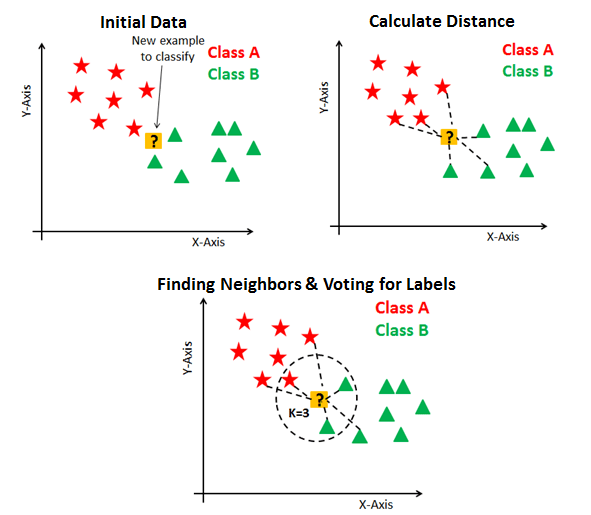

In [22]:
from IPython.display import Image

# Источник - https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
Image("img/knn.png")

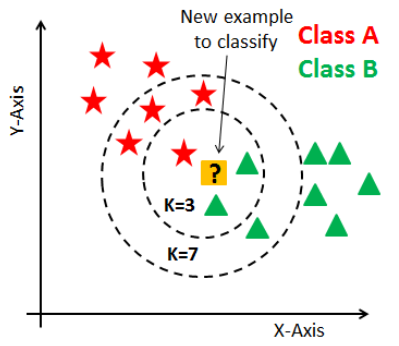

In [23]:
Image("img/knn_hyper_k.png")

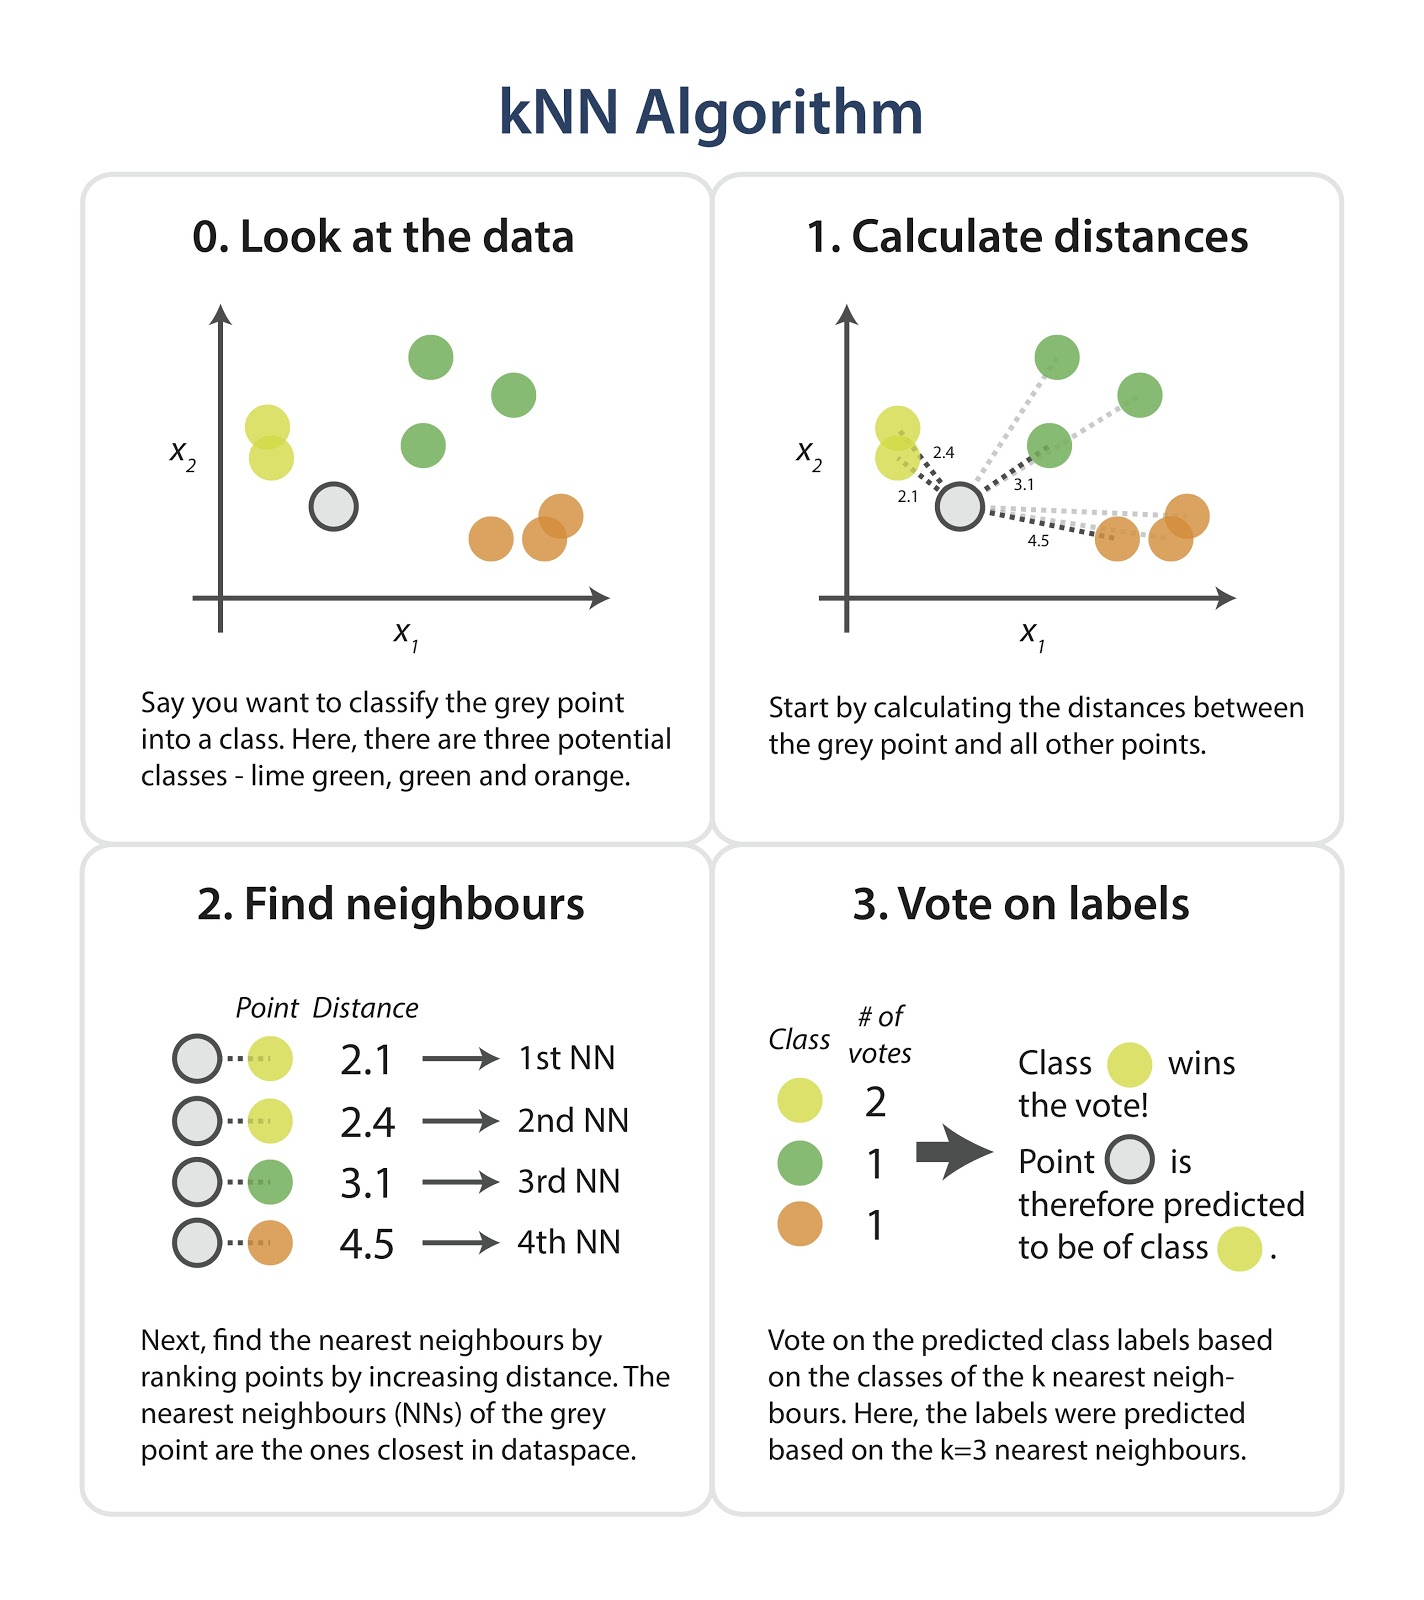

In [24]:
# Источник - https://www.kdnuggets.com/2016/01/implementing-your-own-knn-using-python.html
Image("img/knn2.jpg", width=700)

## Простая реализация алгоритма

### Реализация на языке Python

In [25]:
from operator import itemgetter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import math

In [26]:
from enum import Enum
class PredictionType(Enum):
    CLASSIFICATION = 1
    REGRESSION = 2

In [27]:
class SimpleKNN:
    
    def fit(self, X_train: np.matrix, y_train: np.ndarray):
        """
        Метод обучения, который фактически не учится, 
        а только запоминает обучающую выборку.
        Входные параметры:
        X_train - обучающая выборка (матрица объект-признак)
        y_train - обучающая выборка (вектор целевого признака)
        Возвращаемое значение: нет
        """
        #Сохраняем параметры в переменных класса
        self._X_train = X_train
        self._y_train = y_train
          
    def eucl_dist(self, p: np.ndarray, q: np.ndarray) -> float:
        """
        Вычисление Евклидова расстояния - https://en.wikipedia.org/wiki/Euclidean_distance 
        Входные параметры:
        p, q - вектора в n-мерном пространстве признаков
        """
        return math.sqrt(sum([(pi - qi) ** 2 for pi, qi in zip (p, q)]))
            
            
    def predict_for_single_object(self, K: int, \
                prediction_type: PredictionType, \
                X_o: np.ndarray, \
                verbose = True) -> np.ndarray:
        """
        Метод предсказания для одного объекта.
        Входные параметры:
        K - гиперпараметр, количество соседей 
        prediction_type - классификация или регрессия 
        X_o - строка матрицы объект-признак, соответствующая объекту
        verbose - флаг детального вывода
        Возвращаемое значение: предсказанное значение целевого признака
        """
        # список соседей
        neighbors_list = []
        # *** Находим ближайшие точки ***
        # Перебираем все точки обучающей выборки
        for i in range(self._X_train.shape[0]):
            # получаем текущую точку
            data_train_current_x = [x for x in self._X_train[['Attendance (%)','Stress_Level (1-10)']].iloc[i]]
            # и значение ее y
            data_train_current_y = self._y_train[i]
            # вычисляем расстояние
            dist = self.eucl_dist(X_o, data_train_current_x)
            # сохраняем в список соседей
            temp_res = (data_train_current_y, dist, data_train_current_x)
            neighbors_list.append(temp_res)
        # *** сортируем список соседей по возрастанию расстояния *** 
        # в кортеже элементы следуют в порядке (0,1,2), сортируем по первому элементу 
        neighbors_list_sorted = sorted(neighbors_list, key=itemgetter(1))
        if verbose:
            print()
            print('**************************************')
            print('Проверяемая точка: ', X_o)
            print('**************************************')
            print('Вывод отсортированного списка соседей:')    
            dist_list = []
            for cur_y, cur_dist, temp_x_1_2 in neighbors_list_sorted:
                temp_x1, temp_x2 = temp_x_1_2
                print('X1={0}, X2={1}, y={2}, расстояние={3:.2f}'.format(temp_x1, temp_x2, cur_y, cur_dist))
                dist_list.append(cur_dist)
            print()
            print('Вывод расстояния для отсортированного списка соседей:')    
            plt.plot(dist_list)
            plt.show()
        # Оставим только K ближайших соседей
        K_neighbors_list_sorted = neighbors_list_sorted[:K]
        if verbose:
            print('Вывод К ближайших соседей:')
            x1_list = []
            x2_list = []
            for cur_y, cur_dist, temp_x_1_2 in K_neighbors_list_sorted:
                temp_x1, temp_x2 = temp_x_1_2
                x1_list.append(temp_x1)
                x2_list.append(temp_x2)
                print('X1={0}, X2={1}, y={2}, расстояние={3:.2f}'.format(temp_x1, temp_x2, cur_y, cur_dist))
            print()
            print('Визуализация К ближайших соседей:')
            plt.plot(self._X_train['Attendance (%)'], self._X_train['Stress_Level (1-10)'], 'b.', \
                     x1_list, x2_list,  'g*', \
                    [X_o[0]], [X_o[1]], 'ro')
            plt.show()   
        # Результат - классификация или регрессия
        if prediction_type == PredictionType.REGRESSION:
            # используем numpy для вычисления среднего значения
            arr = np.array([x for x,_,_ in K_neighbors_list_sorted])
            # возвращаем среднее значение
            return np.mean(arr)          
        elif prediction_type == PredictionType.CLASSIFICATION:
            k_y_list = [y for y,_,_ in K_neighbors_list_sorted]
            # группируем с количеством метки классов,
            # соответствующие K ближайшим соседям
            k_y_list_grouped_temp = np.unique(k_y_list, return_counts=True)
            k_y_list_grouped = [[key, cnt] for key, cnt in zip(k_y_list_grouped_temp[0], k_y_list_grouped_temp[1])]
            # сортируем по количеству по убыванию
            k_y_list_grouped_sorted = sorted(k_y_list_grouped, key=itemgetter(1), reverse=True)
            if verbose:
                print('Классы, соответствующие К ближайшим соседям:')
                for i in k_y_list_grouped_sorted:
                    print('класс={0}, количество элементов={1}'.format(i[0], i[1]))
            # возвращаеv метку класса из первой строки отсортированного массива
            # то есть того класса, к которому принадлежит наибольшее количество соседей
            return k_y_list_grouped_sorted[0][0]
        else:
            raise Exception('Неизвестный тип предсказания')
                   
    
    def predict(self, K: int, \
                prediction_type: PredictionType, \
                X_test: np.matrix, 
                verbose = True) -> np.ndarray:
        """
        Метод предсказания.
        Входные параметры:
        K - гиперпараметр, количество соседей 
        prediction_type - классификация или регрессия 
        X_test - тестовая выборка (матрица объект-признак)
        Возвращаемое значение: предсказанный вектор целевого признака
        """
        # Перебираем все точки тестовой выборки
        test_data_temp = []
        for i in range(X_test.shape[0]):
            # получаем текущую точку
            data_test_current_x = [x for x in X_test.iloc[i]]
            test_data_temp.append(data_test_current_x)       
        return [self.predict_for_single_object(K=K, \
                prediction_type=prediction_type, \
                X_o=i, verbose=verbose) for i in test_data_temp]
    

### Обучающая и тестовая выборки

- В качестве обучающей выборки будем использовать наборы, полученные при помощи train_test_split из scikit-learn.
- Конечно, алгоритм может работать с многомерным пространством, но для удобства демонстраиции алгоритма мы используем двухмерный набор данных.
- Если разные признаки имеют сильно отличающиеся диапазоны значений, то применяют масштабирование исходных данных.

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split

data_full = pd.read_csv('data/Students_Grading_Dataset_full.csv', sep=",")
data_full

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,Business,NaN,82.15,60.33,...,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3
4996,S5996,Emma,Brown,student4996@university.com,Male,19,Business,65.11,86.31,49.80,...,60.87,95.96,C,5.0,No,Yes,NaN,Medium,4,4.0
4997,S5997,John,Brown,student4997@university.com,Female,24,CS,87.54,63.55,64.21,...,82.65,54.25,A,24.8,Yes,No,High School,Medium,4,6.3
4998,S5998,Sara,Davis,student4998@university.com,Male,23,CS,92.56,79.79,94.28,...,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4


Проверим датасет на пустые значения. 

In [29]:
# проверим есть ли пропущенные значения
data_full.isnull().sum()

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_full)

In [31]:
strategies=['mean', 'median', 'most_frequent']

# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    return data_num_imp

In [32]:
data_full=data_full.dropna(subset=['Attendance (%)'])

imp2 = SimpleImputer(missing_values=np.nan, strategy='mean')
data_imp2 = imp2.fit_transform(data_full[['Attendance (%)']])
data_full[['Attendance (%)']] = data_imp2

# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(data_full[['Parent_Education_Level']])
data_full[['Parent_Education_Level']] = data_imp2
np.unique(data_full['Parent_Education_Level'])

C:\Users\borizzler\AppData\Local\Temp\ipykernel_10012\1450483609.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_full[['Attendance (%)']] = data_imp2
C:\Users\borizzler\AppData\Local\Temp\ipykernel_10012\1450483609.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_full[['Parent_Education_Level']] = data_imp2


array(["Bachelor's", 'High School', "Master's", 'PhD'], dtype=object)

In [33]:
data_full['Attendance (%)'] = test_num_impute_col(data_full, 'Attendance (%)', strategies[0])
data_full['Assignments_Avg'] = test_num_impute_col(data_full, 'Assignments_Avg', strategies[1])

C:\Users\borizzler\AppData\Local\Temp\ipykernel_10012\329396872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_full['Attendance (%)'] = test_num_impute_col(data_full, 'Attendance (%)', strategies[0])
C:\Users\borizzler\AppData\Local\Temp\ipykernel_10012\329396872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_full['Assignments_Avg'] = test_num_impute_col(data_full, 'Assignments_Avg', strategies[1])


In [34]:
# проверим есть ли пропущенные значения
data_full.isnull().sum()

Student_ID                    0
First_Name                    0
Last_Name                     0
Email                         0
Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64

In [35]:
X = data_full.drop(columns=['Final_Score'])  # Let's say column 'target' is the target\class\label column
y = data_full['Final_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.005,
                                                    train_size=0.015, 
                                                    random_state=42)

In [36]:
data_train_to_csv=X_train
data_train_to_csv['Final_Score']=y_train
data_train_to_csv

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Assignments_Avg,...,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Final_Score
1943,S2943,Emma,Jones,student1943@university.com,Male,18,CS,78.45,93.88,74.79,...,92.30,B,26.8,No,Yes,Master's,Low,7,7.9,97.30
1131,S2131,Sara,Johnson,student1131@university.com,Female,22,CS,69.66,46.42,79.56,...,99.15,A,18.2,Yes,Yes,PhD,Low,4,6.4,85.03
1863,S2863,Emma,Smith,student1863@university.com,Female,21,Mathematics,61.99,64.72,74.79,...,72.20,A,9.5,No,Yes,High School,Low,2,7.3,93.71
1983,S2983,John,Johnson,student1983@university.com,Male,24,Business,86.07,94.19,94.70,...,69.74,A,15.6,Yes,Yes,High School,Low,2,7.2,40.65
4930,S5930,Ahmed,Davis,student4930@university.com,Male,23,Engineering,61.19,50.38,75.03,...,74.86,D,26.2,No,Yes,Bachelor's,Medium,4,4.3,68.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729,S2729,Emma,Brown,student1729@university.com,Female,22,CS,68.42,60.87,61.47,...,74.75,A,27.7,Yes,Yes,Master's,Medium,4,6.3,52.49
4214,S5214,John,Brown,student4214@university.com,Male,21,Business,58.29,58.22,95.96,...,71.75,F,7.4,No,Yes,Master's,Low,9,8.6,42.88
2361,S3361,Sara,Johnson,student2361@university.com,Male,18,CS,59.32,45.25,80.88,...,62.76,D,10.7,Yes,Yes,High School,High,9,8.3,67.98
3320,S4320,Maria,Williams,student3320@university.com,Female,21,Engineering,99.94,57.60,74.79,...,91.44,A,29.9,No,Yes,Master's,Low,3,7.6,57.24


In [37]:
data_test_to_csv=X_test
data_test_to_csv

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Assignments_Avg,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
170,S1170,Liam,Williams,student170@university.com,Female,21,Business,70.65,89.97,84.86,...,90.19,62.28,D,6.1,No,Yes,PhD,Medium,8,8.2
4432,S5432,Omar,Smith,student4432@university.com,Male,21,CS,56.93,99.67,69.02,...,90.27,54.50,F,15.8,Yes,Yes,PhD,Low,1,7.5
1119,S2119,Emma,Williams,student1119@university.com,Female,20,Engineering,62.83,79.37,67.05,...,59.47,88.53,F,5.7,No,Yes,PhD,Low,8,5.7
1238,S2238,Ali,Smith,student1238@university.com,Female,23,Mathematics,80.90,88.79,55.28,...,94.70,87.97,F,5.9,No,Yes,PhD,Low,7,8.4
800,S1800,Ali,Johnson,student800@university.com,Female,24,Engineering,89.47,57.77,52.64,...,74.34,66.87,A,23.5,Yes,Yes,Master's,Low,2,6.1
2995,S3995,Ali,Johnson,student2995@university.com,Female,24,Engineering,57.94,95.86,74.79,...,74.14,68.70,C,24.1,No,Yes,PhD,High,10,8.3
2637,S3637,Sara,Davis,student2637@university.com,Male,18,CS,78.97,83.48,78.63,...,60.39,78.66,C,21.2,No,Yes,PhD,High,1,6.7
4963,S5963,Sara,Johnson,student4963@university.com,Male,23,Mathematics,50.59,54.54,90.99,...,78.45,95.16,C,23.8,No,No,PhD,High,4,6.3
1142,S2142,Liam,Jones,student1142@university.com,Female,18,Business,86.35,76.32,74.69,...,61.24,60.98,A,29.1,No,Yes,Master's,High,8,4.9
1596,S2596,Maria,Smith,student1596@university.com,Male,20,CS,90.87,49.57,52.13,...,86.07,82.61,B,19.6,No,No,High School,Low,7,7.0


Запишем полученные датасеты в .csv и запишем в новые переменные (для чистоты эксперимента).

In [38]:
pd.DataFrame.to_csv(data_test_to_csv, './data/students_test.csv', sep=",", index=False)
pd.DataFrame.to_csv(data_train_to_csv, './data/students_train.csv', sep=",", index=False)

Теперь считаем их снова:

In [39]:
data_train = pd.read_csv('data/students_train.csv', sep=",")
data_test = pd.read_csv('data/students_test.csv', sep=",")

Целевой признак $y$ предназначен для регресии. Построим на его основе  признак для классификации.

In [40]:
def regr_to_class(y: float) -> str:
    if y<50.0:
        result = 'D'
    elif y<65.0:
        result = 'C'
    elif y<80.0:
        result = 'B'
    else:
        result = 'A'        
    return result 

In [41]:
# формирование второго целевого признака для классификации
data_train['y_clas'] = \
data_train.apply(lambda row: regr_to_class(row['Final_Score']),axis=1)

In [42]:
data_train

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Assignments_Avg,...,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Final_Score,y_clas
0,S2943,Emma,Jones,student1943@university.com,Male,18,CS,78.45,93.88,74.79,...,B,26.8,No,Yes,Master's,Low,7,7.9,97.30,A
1,S2131,Sara,Johnson,student1131@university.com,Female,22,CS,69.66,46.42,79.56,...,A,18.2,Yes,Yes,PhD,Low,4,6.4,85.03,A
2,S2863,Emma,Smith,student1863@university.com,Female,21,Mathematics,61.99,64.72,74.79,...,A,9.5,No,Yes,High School,Low,2,7.3,93.71,A
3,S2983,John,Johnson,student1983@university.com,Male,24,Business,86.07,94.19,94.70,...,A,15.6,Yes,Yes,High School,Low,2,7.2,40.65,D
4,S5930,Ahmed,Davis,student4930@university.com,Male,23,Engineering,61.19,50.38,75.03,...,D,26.2,No,Yes,Bachelor's,Medium,4,4.3,68.40,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,S2729,Emma,Brown,student1729@university.com,Female,22,CS,68.42,60.87,61.47,...,A,27.7,Yes,Yes,Master's,Medium,4,6.3,52.49,C
63,S5214,John,Brown,student4214@university.com,Male,21,Business,58.29,58.22,95.96,...,F,7.4,No,Yes,Master's,Low,9,8.6,42.88,D
64,S3361,Sara,Johnson,student2361@university.com,Male,18,CS,59.32,45.25,80.88,...,D,10.7,Yes,Yes,High School,High,9,8.3,67.98,B
65,S4320,Maria,Williams,student3320@university.com,Female,21,Engineering,99.94,57.60,74.79,...,A,29.9,No,Yes,Master's,Low,3,7.6,57.24,C


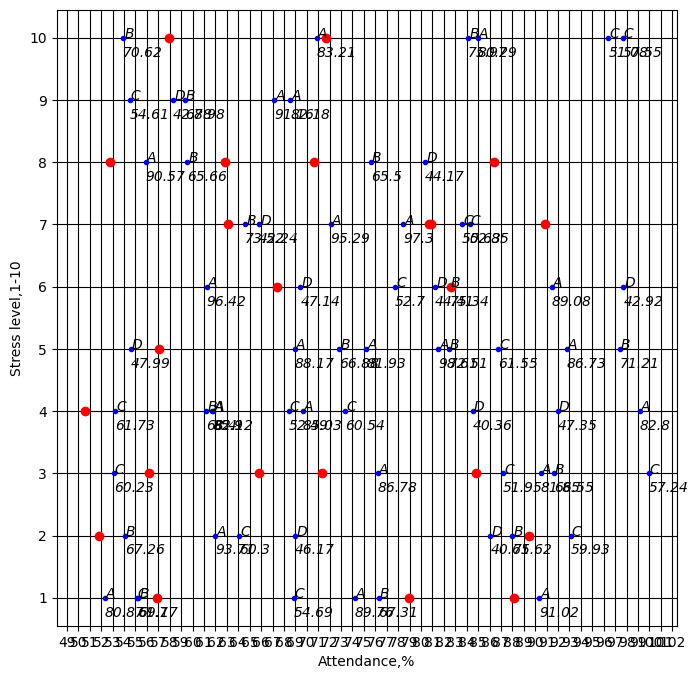

In [43]:
# визуализация выборки
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(data_train['Attendance (%)'], data_train['Stress_Level (1-10)'], 'b.', \
         data_test['Attendance (%)'], data_test['Stress_Level (1-10)'], 'ro')

# деления на осях и сетка
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.grid(which='major', color = 'k')

# подписи к осям
plt.xlabel('Attendance,%')
plt.ylabel('Stress level,1-10')
   
# подписи 
for coords in data_train[['Attendance (%)','Stress_Level (1-10)', 'Final_Score', 'y_clas']].values:
    x1, x2, y_cl, cl = coords[0], coords[1], coords[2], coords[3]
    #label = '{} ({})'.format(y_cl, cl)
    #ax.text(x1 + 0.1, x2, label, style='italic', fontsize=7)
    ax.text(x1 + 0.1, x2, cl, style='italic', fontsize=10)
    ax.text(x1, x2-0.3, y_cl, style='italic', fontsize=10)

plt.show()    

Фактически, построение модели состоит в аппроксимации функции многих переменных по известным точкам обучающей выборки. В данном примере $X_1$ и $X_2$ являются переменными. Значение функции подписано для каждой точки обучающей выборки.

Документация по выводу точек:

https://matplotlib.org/users/pyplot_tutorial.html

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

### Фаза обучения

- Особенность метода заключается в том, что фаза обучения как таковая отсутствует. При обучении необходимо только сохранить обучающую выборку $X^{train}|Y^{train}$, которая будет использоваться для выбора ближайших соседей на этапе предсказания. 

- В этом отношении k-NN очень нетипичный метод. В большинстве других методов на этапе обучения используется массивная обработка данных и построение сложной модели аппроксимации для дальнейших предсказаний.

#### Пример с регрессией

In [44]:
# создаем объект класса
simple_knn_regr = SimpleKNN()

In [45]:
# вызываем метод обучения
simple_knn_regr.fit(data_train[['Attendance (%)','Stress_Level (1-10)']], data_train['Final_Score'])

In [46]:
# параметры метода
# матрица объект-признак
simple_knn_regr._X_train

,Attendance (%),Stress_Level (1-10)
0,78.45,7
1,69.66,4
2,61.99,2
3,86.07,2
4,61.19,4
...,...,...
62,68.42,4
63,58.29,9
64,59.32,9
65,99.94,3


In [47]:
# вектор целевого признака
simple_knn_regr._y_train

0     97.30
1     85.03
2     93.71
3     40.65
4     68.40
      ...  
62    52.49
63    42.88
64    67.98
65    57.24
66    54.61
Name: Final_Score, Length: 67, dtype: float64

#### Пример с классификацией

In [48]:
simple_knn_clas = SimpleKNN()
simple_knn_clas.fit(data_train[['Attendance (%)','Stress_Level (1-10)']], data_train['y_clas'])

In [49]:
simple_knn_clas._X_train

,Attendance (%),Stress_Level (1-10)
0,78.45,7
1,69.66,4
2,61.99,2
3,86.07,2
4,61.19,4
...,...,...
62,68.42,4
63,58.29,9
64,59.32,9
65,99.94,3


In [50]:
simple_knn_clas._y_train

0     A
1     A
2     A
3     D
4     B
     ..
62    C
63    D
64    B
65    C
66    C
Name: y_clas, Length: 67, dtype: object

### Фаза предсказания

Фаза предсказания в методе ближайших соседей достаточно проста (здесь разобран наиболее простой алгоритм):
1. Необходимо вычислить расстояние от искомой точки до всех точек обучающей выборки:
  1. Для того, чтобы вычислить расстояние, в пространстве точек необходимо ввести метрику (функцию дистанции).
  1. Наиболее часто используется Евклидова метрика. Для векторов $p$ и $q$ в n-мерном пространстве:
  $$d(p,q)= \sqrt{ (p_1-q_1)^2 + (p_2-q_2)^2 + \cdots + (p_n-q_n)^2 } = \sqrt{ \sum_{i=1}^{n} (p_i-q_i)^2} $$
  Также могут использоваться более сложные метрики https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html
  
1. Сортируем массив найденных расстояний по возрастанию.
1. Выбираем K первых элементов массива (соответствующих точкам обучающей выборки, наиболее близких к искомой), знаем $Y_{o}^{train}$ для этих точек, объединяем найденные $Y_{o}^{train}$ в массив $YK^{train}$. Таким образом, массив $YK^{train}$ - это подмножество вектора $Y^{train}$, соответствующий  K точкам обучающей выборки, наиболее близким к искомой точке.
1. Для полученого массива $YK^{train}$ необходимо вычислить регрессию или класификацию:
    - В случае регрессии берется среднее по всем значениям массива - $mean(YK^{train})$
    - В случае классификации возвращается метка класса, наиболее часто встречающегося в $YK^{train}$. То есть мы присоединяем точку к тому классу, к которому уже принадлежит больше всего соседей.
    - Существуют другие подходы к классификации, например возвращать метку класса для наиболее близкого соседа (в этом случае фактически не учитывается гиперпараметр К).
 

In [51]:
# первая строка тестовой выборки
data_test_0 = [x for x in data_test[['Attendance (%)','Stress_Level (1-10)']].iloc[0]]
data_test_0

[70.65, 8.0]


**************************************
Проверяемая точка:  [70.65, 8.0]
**************************************
Вывод отсортированного списка соседей:
X1=72.1, X2=7.0, y=95.29, расстояние=1.76
X1=70.87, X2=10.0, y=83.21, расстояние=2.01
X1=69.45, X2=6.0, y=47.14, расстояние=2.33
X1=68.54, X2=9.0, y=82.18, расстояние=2.33
X1=68.94, X2=5.0, y=88.17, расстояние=3.45
X1=67.14, X2=9.0, y=91.16, расстояние=3.65
X1=72.86, X2=5.0, y=66.88, расстояние=3.73
X1=69.66, X2=4.0, y=85.03, расстояние=4.12
X1=68.42, X2=4.0, y=52.49, расстояние=4.58
X1=73.39, X2=4.0, y=60.54, расстояние=4.85
X1=65.83, X2=7.0, y=42.24, расстояние=4.92
X1=75.6, X2=8.0, y=65.5, расстояние=4.95
X1=75.21, X2=5.0, y=81.93, расстояние=5.46
X1=64.6, X2=7.0, y=73.52, расстояние=6.13
X1=68.98, X2=2.0, y=46.17, расстояние=6.23
X1=68.84, X2=1.0, y=54.69, расстояние=7.23
X1=77.74, X2=6.0, y=52.7, расстояние=7.37
X1=76.22, X2=3.0, y=86.78, расстояние=7.48
X1=74.18, X2=1.0, y=89.76, расстояние=7.84
X1=78.45, X2=7.0, y=97.3, расстояние

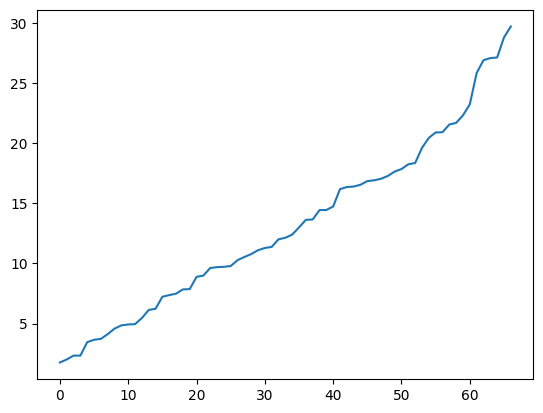

Вывод К ближайших соседей:
X1=72.1, X2=7.0, y=95.29, расстояние=1.76
X1=70.87, X2=10.0, y=83.21, расстояние=2.01
X1=69.45, X2=6.0, y=47.14, расстояние=2.33
X1=68.54, X2=9.0, y=82.18, расстояние=2.33
X1=68.94, X2=5.0, y=88.17, расстояние=3.45

Визуализация К ближайших соседей:


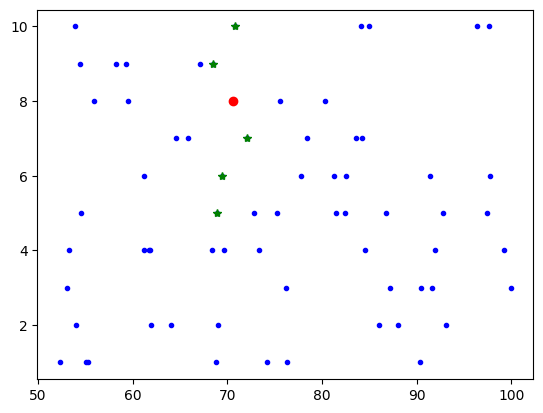

79.19800000000001

In [52]:
# построим предсказание для одного объекта (регрессия)
simple_knn_regr_0 = simple_knn_regr.predict_for_single_object(K=5, \
                          prediction_type=PredictionType.REGRESSION, \
                          X_o=data_test_0)
simple_knn_regr_0

In [53]:
# Среднее значение y для соседей
np.mean([1.9, 2.0, 1.2, 1.1, 4.0])

2.04


**************************************
Проверяемая точка:  [70.65, 8.0]
**************************************
Вывод отсортированного списка соседей:
X1=72.1, X2=7.0, y=A, расстояние=1.76
X1=70.87, X2=10.0, y=A, расстояние=2.01
X1=69.45, X2=6.0, y=D, расстояние=2.33
X1=68.54, X2=9.0, y=A, расстояние=2.33
X1=68.94, X2=5.0, y=A, расстояние=3.45
X1=67.14, X2=9.0, y=A, расстояние=3.65
X1=72.86, X2=5.0, y=B, расстояние=3.73
X1=69.66, X2=4.0, y=A, расстояние=4.12
X1=68.42, X2=4.0, y=C, расстояние=4.58
X1=73.39, X2=4.0, y=C, расстояние=4.85
X1=65.83, X2=7.0, y=D, расстояние=4.92
X1=75.6, X2=8.0, y=B, расстояние=4.95
X1=75.21, X2=5.0, y=A, расстояние=5.46
X1=64.6, X2=7.0, y=B, расстояние=6.13
X1=68.98, X2=2.0, y=D, расстояние=6.23
X1=68.84, X2=1.0, y=C, расстояние=7.23
X1=77.74, X2=6.0, y=C, расстояние=7.37
X1=76.22, X2=3.0, y=A, расстояние=7.48
X1=74.18, X2=1.0, y=A, расстояние=7.84
X1=78.45, X2=7.0, y=A, расстояние=7.86
X1=64.1, X2=2.0, y=C, расстояние=8.88
X1=76.29, X2=1.0, y=B, расстояние

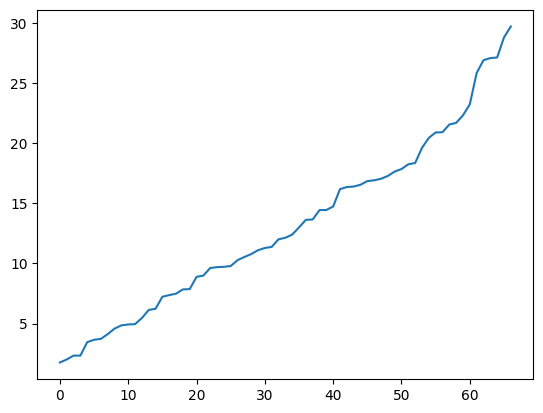

Вывод К ближайших соседей:
X1=72.1, X2=7.0, y=A, расстояние=1.76
X1=70.87, X2=10.0, y=A, расстояние=2.01
X1=69.45, X2=6.0, y=D, расстояние=2.33
X1=68.54, X2=9.0, y=A, расстояние=2.33
X1=68.94, X2=5.0, y=A, расстояние=3.45

Визуализация К ближайших соседей:


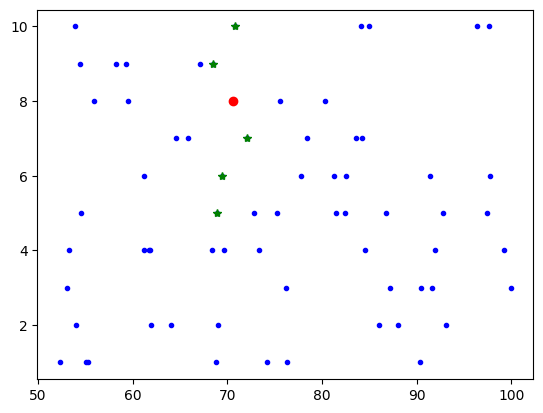

Классы, соответствующие К ближайшим соседям:
класс=A, количество элементов=4
класс=D, количество элементов=1


'A'

In [54]:
# построим предсказание для одного объекта (классификация)
simple_knn_clas_0 = simple_knn_clas.predict_for_single_object(K=5, \
                          prediction_type=PredictionType.CLASSIFICATION, \
                          X_o=data_test_0)
simple_knn_clas_0


**************************************
Проверяемая точка:  [70.65, 8.0]
**************************************
Вывод отсортированного списка соседей:
X1=72.1, X2=7.0, y=95.29, расстояние=1.76
X1=70.87, X2=10.0, y=83.21, расстояние=2.01
X1=69.45, X2=6.0, y=47.14, расстояние=2.33
X1=68.54, X2=9.0, y=82.18, расстояние=2.33
X1=68.94, X2=5.0, y=88.17, расстояние=3.45
X1=67.14, X2=9.0, y=91.16, расстояние=3.65
X1=72.86, X2=5.0, y=66.88, расстояние=3.73
X1=69.66, X2=4.0, y=85.03, расстояние=4.12
X1=68.42, X2=4.0, y=52.49, расстояние=4.58
X1=73.39, X2=4.0, y=60.54, расстояние=4.85
X1=65.83, X2=7.0, y=42.24, расстояние=4.92
X1=75.6, X2=8.0, y=65.5, расстояние=4.95
X1=75.21, X2=5.0, y=81.93, расстояние=5.46
X1=64.6, X2=7.0, y=73.52, расстояние=6.13
X1=68.98, X2=2.0, y=46.17, расстояние=6.23
X1=68.84, X2=1.0, y=54.69, расстояние=7.23
X1=77.74, X2=6.0, y=52.7, расстояние=7.37
X1=76.22, X2=3.0, y=86.78, расстояние=7.48
X1=74.18, X2=1.0, y=89.76, расстояние=7.84
X1=78.45, X2=7.0, y=97.3, расстояние

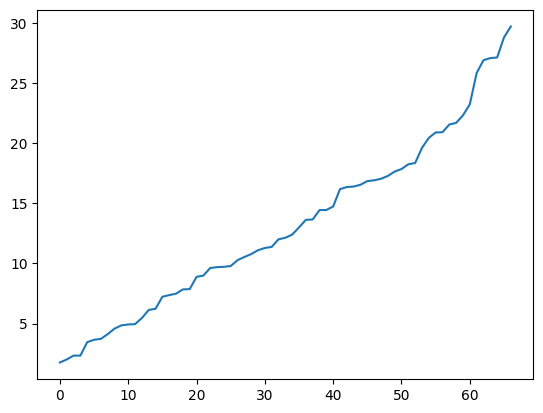

Вывод К ближайших соседей:
X1=72.1, X2=7.0, y=95.29, расстояние=1.76
X1=70.87, X2=10.0, y=83.21, расстояние=2.01
X1=69.45, X2=6.0, y=47.14, расстояние=2.33
X1=68.54, X2=9.0, y=82.18, расстояние=2.33
X1=68.94, X2=5.0, y=88.17, расстояние=3.45

Визуализация К ближайших соседей:


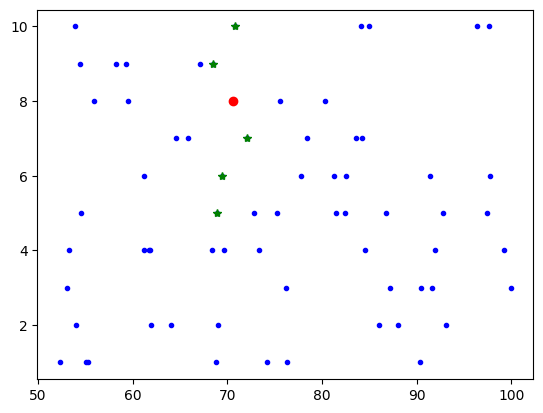


**************************************
Проверяемая точка:  [56.93, 1.0]
**************************************
Вывод отсортированного списка соседей:
X1=55.25, X2=1.0, y=69.17, расстояние=1.68
X1=55.11, X2=1.0, y=61.7, расстояние=1.82
X1=54.06, X2=2.0, y=67.26, расстояние=3.04
X1=53.1, X2=3.0, y=60.23, расстояние=4.32
X1=52.33, X2=1.0, y=80.87, расстояние=4.60
X1=54.57, X2=5.0, y=47.99, расстояние=4.64
X1=53.25, X2=4.0, y=61.73, расстояние=4.75
X1=61.99, X2=2.0, y=93.71, расстояние=5.16
X1=61.19, X2=4.0, y=68.4, расстояние=5.21
X1=61.72, X2=4.0, y=85.9, расстояние=5.65
X1=61.82, X2=4.0, y=82.12, расстояние=5.74
X1=61.24, X2=6.0, y=96.42, расстояние=6.60
X1=55.91, X2=8.0, y=90.57, расстояние=7.07
X1=64.1, X2=2.0, y=60.3, расстояние=7.24
X1=59.55, X2=8.0, y=65.66, расстояние=7.47
X1=58.29, X2=9.0, y=42.88, расстояние=8.11
X1=59.32, X2=9.0, y=67.98, расстояние=8.35
X1=54.5, X2=9.0, y=54.61, расстояние=8.36
X1=53.92, X2=10.0, y=70.62, расстояние=9.49
X1=64.6, X2=7.0, y=73.52, расстояние=9

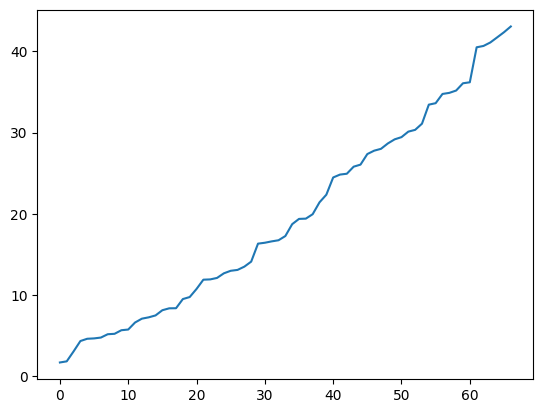

Вывод К ближайших соседей:
X1=55.25, X2=1.0, y=69.17, расстояние=1.68
X1=55.11, X2=1.0, y=61.7, расстояние=1.82
X1=54.06, X2=2.0, y=67.26, расстояние=3.04
X1=53.1, X2=3.0, y=60.23, расстояние=4.32
X1=52.33, X2=1.0, y=80.87, расстояние=4.60

Визуализация К ближайших соседей:


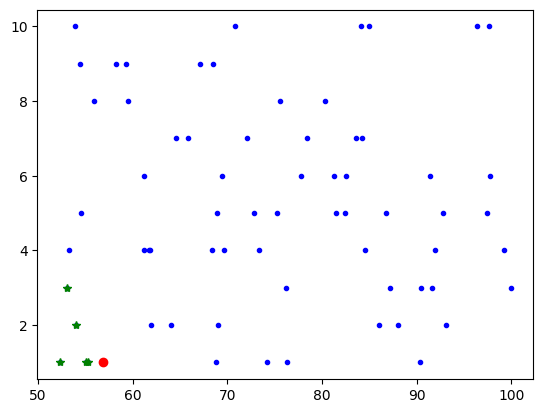


**************************************
Проверяемая точка:  [62.83, 8.0]
**************************************
Вывод отсортированного списка соседей:
X1=64.6, X2=7.0, y=73.52, расстояние=2.03
X1=61.24, X2=6.0, y=96.42, расстояние=2.56
X1=65.83, X2=7.0, y=42.24, расстояние=3.16
X1=59.55, X2=8.0, y=65.66, расстояние=3.28
X1=59.32, X2=9.0, y=67.98, расстояние=3.65
X1=61.82, X2=4.0, y=82.12, расстояние=4.13
X1=61.72, X2=4.0, y=85.9, расстояние=4.15
X1=61.19, X2=4.0, y=68.4, расстояние=4.32
X1=67.14, X2=9.0, y=91.16, расстояние=4.42
X1=58.29, X2=9.0, y=42.88, расстояние=4.65
X1=68.54, X2=9.0, y=82.18, расстояние=5.80
X1=61.99, X2=2.0, y=93.71, расстояние=6.06
X1=64.1, X2=2.0, y=60.3, расстояние=6.13
X1=68.94, X2=5.0, y=88.17, расстояние=6.81
X1=68.42, X2=4.0, y=52.49, расстояние=6.87
X1=69.45, X2=6.0, y=47.14, расстояние=6.92
X1=55.91, X2=8.0, y=90.57, расстояние=6.92
X1=69.66, X2=4.0, y=85.03, расстояние=7.92
X1=70.87, X2=10.0, y=83.21, расстояние=8.29
X1=54.5, X2=9.0, y=54.61, расстояние

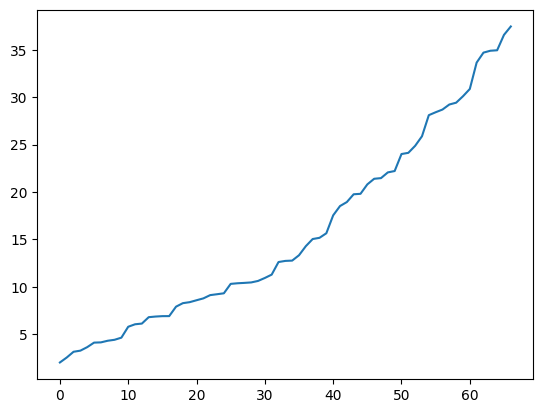

Вывод К ближайших соседей:
X1=64.6, X2=7.0, y=73.52, расстояние=2.03
X1=61.24, X2=6.0, y=96.42, расстояние=2.56
X1=65.83, X2=7.0, y=42.24, расстояние=3.16
X1=59.55, X2=8.0, y=65.66, расстояние=3.28
X1=59.32, X2=9.0, y=67.98, расстояние=3.65

Визуализация К ближайших соседей:


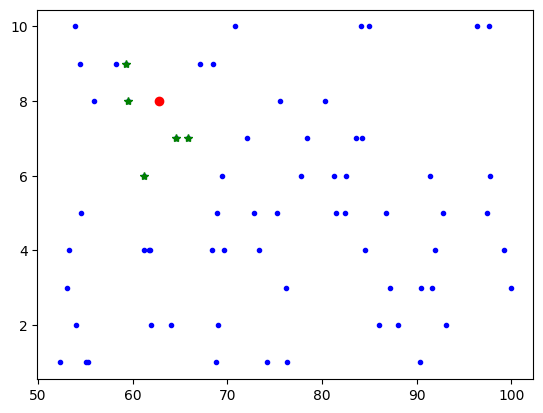


**************************************
Проверяемая точка:  [80.9, 7.0]
**************************************
Вывод отсортированного списка соседей:
X1=81.24, X2=6.0, y=44.41, расстояние=1.06
X1=80.37, X2=8.0, y=44.17, расстояние=1.13
X1=82.49, X2=6.0, y=75.34, расстояние=1.88
X1=81.53, X2=5.0, y=98.61, расстояние=2.10
X1=78.45, X2=7.0, y=97.3, расстояние=2.45
X1=82.41, X2=5.0, y=72.51, расстояние=2.51
X1=83.61, X2=7.0, y=50.63, расстояние=2.71
X1=77.74, X2=6.0, y=52.7, расстояние=3.31
X1=84.27, X2=7.0, y=52.85, расстояние=3.37
X1=84.13, X2=10.0, y=75.97, расстояние=4.41
X1=84.53, X2=4.0, y=40.36, расстояние=4.71
X1=84.95, X2=10.0, y=80.29, расстояние=5.04
X1=75.6, X2=8.0, y=65.5, расстояние=5.39
X1=75.21, X2=5.0, y=81.93, расстояние=6.03
X1=76.22, X2=3.0, y=86.78, расстояние=6.16
X1=86.77, X2=5.0, y=61.55, расстояние=6.20
X1=86.07, X2=2.0, y=40.65, расстояние=7.19
X1=87.19, X2=3.0, y=51.95, расстояние=7.45
X1=76.29, X2=1.0, y=67.31, расстояние=7.57
X1=73.39, X2=4.0, y=60.54, расстоян

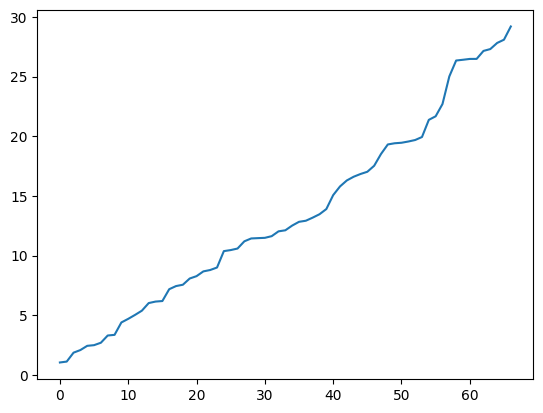

Вывод К ближайших соседей:
X1=81.24, X2=6.0, y=44.41, расстояние=1.06
X1=80.37, X2=8.0, y=44.17, расстояние=1.13
X1=82.49, X2=6.0, y=75.34, расстояние=1.88
X1=81.53, X2=5.0, y=98.61, расстояние=2.10
X1=78.45, X2=7.0, y=97.3, расстояние=2.45

Визуализация К ближайших соседей:


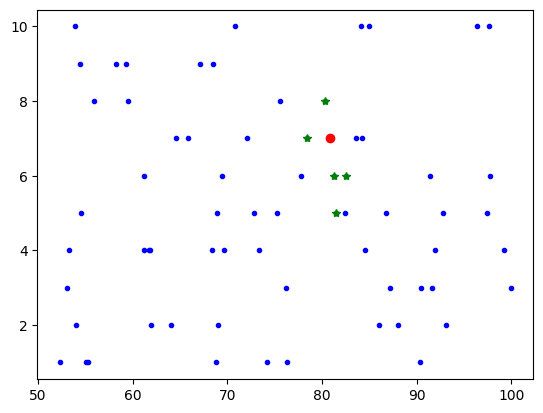


**************************************
Проверяемая точка:  [89.47, 2.0]
**************************************
Вывод отсортированного списка соседей:
X1=90.36, X2=1.0, y=91.02, расстояние=1.34
X1=90.48, X2=3.0, y=81.85, расстояние=1.42
X1=88.0, X2=2.0, y=71.62, расстояние=1.47
X1=91.62, X2=3.0, y=66.55, расстояние=2.37
X1=87.19, X2=3.0, y=51.95, расстояние=2.49
X1=91.97, X2=4.0, y=47.35, расстояние=3.20
X1=86.07, X2=2.0, y=40.65, расстояние=3.40
X1=93.1, X2=2.0, y=59.93, расстояние=3.63
X1=86.77, X2=5.0, y=61.55, расстояние=4.04
X1=92.77, X2=5.0, y=86.73, расстояние=4.46
X1=91.45, X2=6.0, y=89.08, расстояние=4.46
X1=84.53, X2=4.0, y=40.36, расстояние=5.33
X1=84.27, X2=7.0, y=52.85, расстояние=7.21
X1=82.41, X2=5.0, y=72.51, расстояние=7.67
X1=83.61, X2=7.0, y=50.63, расстояние=7.70
X1=82.49, X2=6.0, y=75.34, расстояние=8.04
X1=97.39, X2=5.0, y=71.21, расстояние=8.47
X1=81.53, X2=5.0, y=98.61, расстояние=8.49
X1=81.24, X2=6.0, y=44.41, расстояние=9.15
X1=97.71, X2=6.0, y=42.92, расстоя

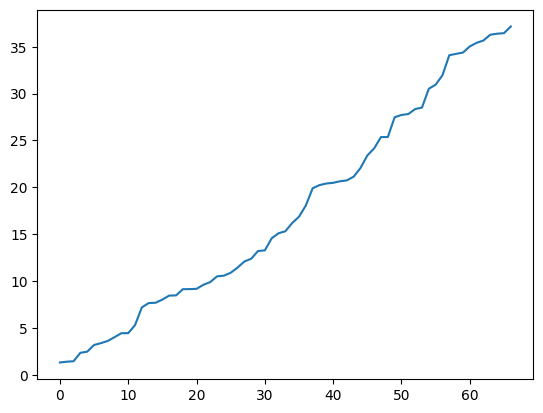

Вывод К ближайших соседей:
X1=90.36, X2=1.0, y=91.02, расстояние=1.34
X1=90.48, X2=3.0, y=81.85, расстояние=1.42
X1=88.0, X2=2.0, y=71.62, расстояние=1.47
X1=91.62, X2=3.0, y=66.55, расстояние=2.37
X1=87.19, X2=3.0, y=51.95, расстояние=2.49

Визуализация К ближайших соседей:


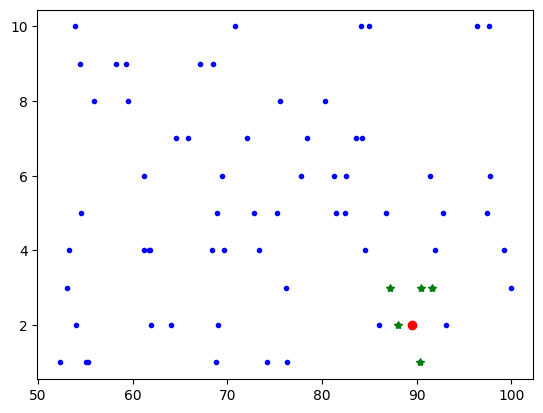


**************************************
Проверяемая точка:  [57.94, 10.0]
**************************************
Вывод отсортированного списка соседей:
X1=58.29, X2=9.0, y=42.88, расстояние=1.06
X1=59.32, X2=9.0, y=67.98, расстояние=1.70
X1=59.55, X2=8.0, y=65.66, расстояние=2.57
X1=55.91, X2=8.0, y=90.57, расстояние=2.85
X1=54.5, X2=9.0, y=54.61, расстояние=3.58
X1=53.92, X2=10.0, y=70.62, расстояние=4.02
X1=61.24, X2=6.0, y=96.42, расстояние=5.19
X1=54.57, X2=5.0, y=47.99, расстояние=6.03
X1=61.19, X2=4.0, y=68.4, расстояние=6.82
X1=61.72, X2=4.0, y=85.9, расстояние=7.09
X1=61.82, X2=4.0, y=82.12, расстояние=7.15
X1=64.6, X2=7.0, y=73.52, расстояние=7.30
X1=53.25, X2=4.0, y=61.73, расстояние=7.62
X1=65.83, X2=7.0, y=42.24, расстояние=8.44
X1=53.1, X2=3.0, y=60.23, расстояние=8.51
X1=54.06, X2=2.0, y=67.26, расстояние=8.89
X1=61.99, X2=2.0, y=93.71, расстояние=8.97
X1=67.14, X2=9.0, y=91.16, расстояние=9.25
X1=55.25, X2=1.0, y=69.17, расстояние=9.39
X1=55.11, X2=1.0, y=61.7, расстояни

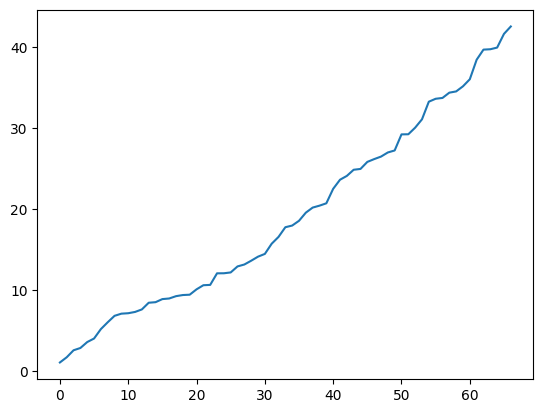

Вывод К ближайших соседей:
X1=58.29, X2=9.0, y=42.88, расстояние=1.06
X1=59.32, X2=9.0, y=67.98, расстояние=1.70
X1=59.55, X2=8.0, y=65.66, расстояние=2.57
X1=55.91, X2=8.0, y=90.57, расстояние=2.85
X1=54.5, X2=9.0, y=54.61, расстояние=3.58

Визуализация К ближайших соседей:


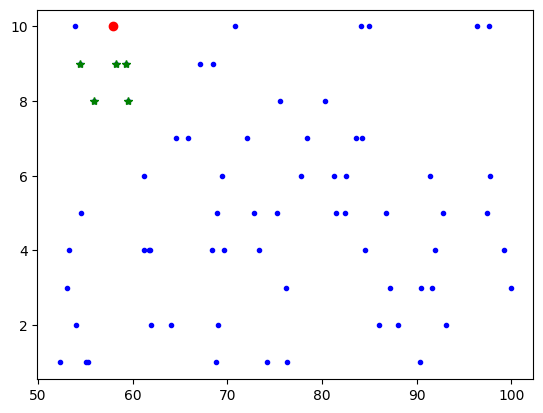


**************************************
Проверяемая точка:  [78.97, 1.0]
**************************************
Вывод отсортированного списка соседей:
X1=76.29, X2=1.0, y=67.31, расстояние=2.68
X1=76.22, X2=3.0, y=86.78, расстояние=3.40
X1=81.53, X2=5.0, y=98.61, расстояние=4.75
X1=74.18, X2=1.0, y=89.76, расстояние=4.79
X1=77.74, X2=6.0, y=52.7, расстояние=5.15
X1=82.41, X2=5.0, y=72.51, расстояние=5.28
X1=75.21, X2=5.0, y=81.93, расстояние=5.49
X1=81.24, X2=6.0, y=44.41, расстояние=5.49
X1=78.45, X2=7.0, y=97.3, расстояние=6.02
X1=82.49, X2=6.0, y=75.34, расстояние=6.11
X1=84.53, X2=4.0, y=40.36, расстояние=6.32
X1=73.39, X2=4.0, y=60.54, расстояние=6.34
X1=80.37, X2=8.0, y=44.17, расстояние=7.14
X1=86.07, X2=2.0, y=40.65, расстояние=7.17
X1=72.86, X2=5.0, y=66.88, расстояние=7.30
X1=83.61, X2=7.0, y=50.63, расстояние=7.58
X1=75.6, X2=8.0, y=65.5, расстояние=7.77
X1=84.27, X2=7.0, y=52.85, расстояние=8.01
X1=87.19, X2=3.0, y=51.95, расстояние=8.46
X1=86.77, X2=5.0, y=61.55, расстояни

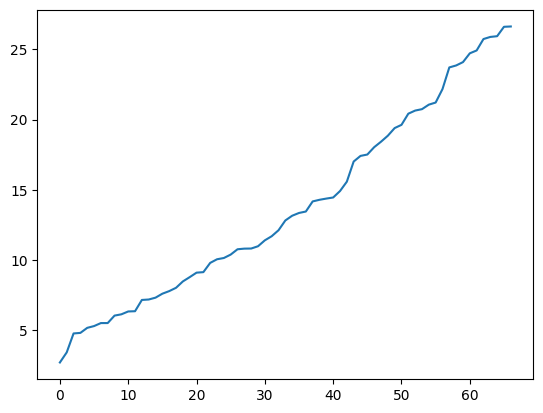

Вывод К ближайших соседей:
X1=76.29, X2=1.0, y=67.31, расстояние=2.68
X1=76.22, X2=3.0, y=86.78, расстояние=3.40
X1=81.53, X2=5.0, y=98.61, расстояние=4.75
X1=74.18, X2=1.0, y=89.76, расстояние=4.79
X1=77.74, X2=6.0, y=52.7, расстояние=5.15

Визуализация К ближайших соседей:


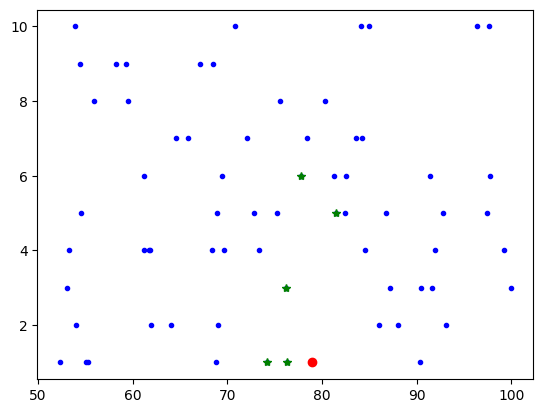


**************************************
Проверяемая точка:  [50.59, 4.0]
**************************************
Вывод отсортированного списка соседей:
X1=53.25, X2=4.0, y=61.73, расстояние=2.66
X1=53.1, X2=3.0, y=60.23, расстояние=2.70
X1=52.33, X2=1.0, y=80.87, расстояние=3.47
X1=54.06, X2=2.0, y=67.26, расстояние=4.01
X1=54.57, X2=5.0, y=47.99, расстояние=4.10
X1=55.11, X2=1.0, y=61.7, расстояние=5.42
X1=55.25, X2=1.0, y=69.17, расстояние=5.54
X1=54.5, X2=9.0, y=54.61, расстояние=6.35
X1=55.91, X2=8.0, y=90.57, расстояние=6.66
X1=53.92, X2=10.0, y=70.62, расстояние=6.86
X1=58.29, X2=9.0, y=42.88, расстояние=9.18
X1=59.55, X2=8.0, y=65.66, расстояние=9.81
X1=59.32, X2=9.0, y=67.98, расстояние=10.06
X1=61.19, X2=4.0, y=68.4, расстояние=10.60
X1=61.24, X2=6.0, y=96.42, расстояние=10.84
X1=61.72, X2=4.0, y=85.9, расстояние=11.13
X1=61.82, X2=4.0, y=82.12, расстояние=11.23
X1=61.99, X2=2.0, y=93.71, расстояние=11.57
X1=64.1, X2=2.0, y=60.3, расстояние=13.66
X1=64.6, X2=7.0, y=73.52, расст

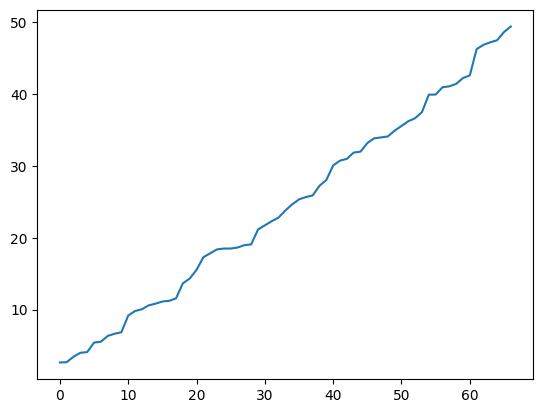

Вывод К ближайших соседей:
X1=53.25, X2=4.0, y=61.73, расстояние=2.66
X1=53.1, X2=3.0, y=60.23, расстояние=2.70
X1=52.33, X2=1.0, y=80.87, расстояние=3.47
X1=54.06, X2=2.0, y=67.26, расстояние=4.01
X1=54.57, X2=5.0, y=47.99, расстояние=4.10

Визуализация К ближайших соседей:


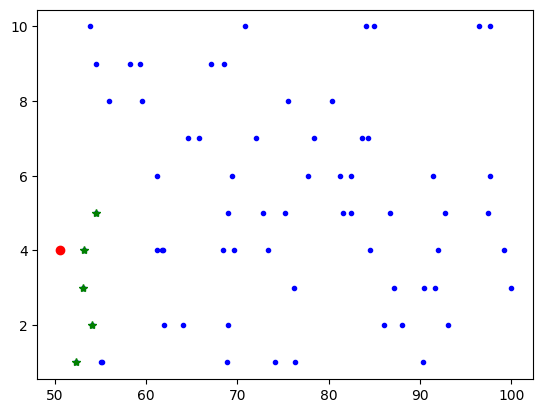


**************************************
Проверяемая точка:  [86.35, 8.0]
**************************************
Вывод отсортированного списка соседей:
X1=84.27, X2=7.0, y=52.85, расстояние=2.31
X1=84.95, X2=10.0, y=80.29, расстояние=2.44
X1=83.61, X2=7.0, y=50.63, расстояние=2.92
X1=84.13, X2=10.0, y=75.97, расстояние=2.99
X1=86.77, X2=5.0, y=61.55, расстояние=3.03
X1=82.49, X2=6.0, y=75.34, расстояние=4.35
X1=84.53, X2=4.0, y=40.36, расстояние=4.39
X1=82.41, X2=5.0, y=72.51, расстояние=4.95
X1=87.19, X2=3.0, y=51.95, расстояние=5.07
X1=91.45, X2=6.0, y=89.08, расстояние=5.48
X1=81.24, X2=6.0, y=44.41, расстояние=5.49
X1=81.53, X2=5.0, y=98.61, расстояние=5.68
X1=80.37, X2=8.0, y=44.17, расстояние=5.98
X1=86.07, X2=2.0, y=40.65, расстояние=6.01
X1=88.0, X2=2.0, y=71.62, расстояние=6.22
X1=90.48, X2=3.0, y=81.85, расстояние=6.49
X1=91.97, X2=4.0, y=47.35, расстояние=6.90
X1=92.77, X2=5.0, y=86.73, расстояние=7.09
X1=91.62, X2=3.0, y=66.55, расстояние=7.26
X1=78.45, X2=7.0, y=97.3, расст

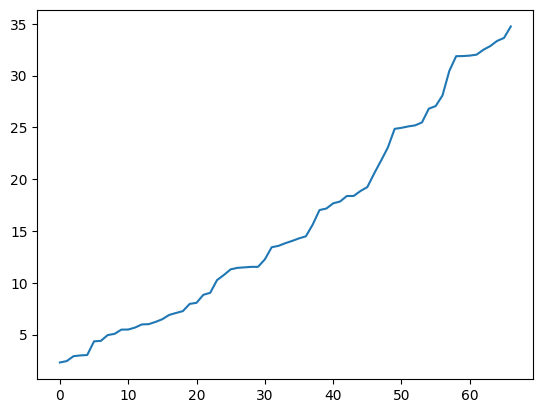

Вывод К ближайших соседей:
X1=84.27, X2=7.0, y=52.85, расстояние=2.31
X1=84.95, X2=10.0, y=80.29, расстояние=2.44
X1=83.61, X2=7.0, y=50.63, расстояние=2.92
X1=84.13, X2=10.0, y=75.97, расстояние=2.99
X1=86.77, X2=5.0, y=61.55, расстояние=3.03

Визуализация К ближайших соседей:


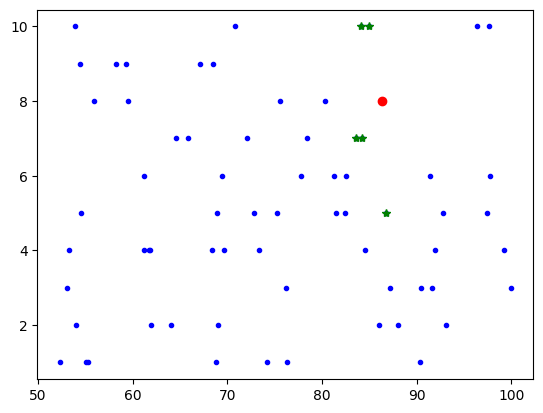


**************************************
Проверяемая точка:  [90.87, 7.0]
**************************************
Вывод отсортированного списка соседей:
X1=91.45, X2=6.0, y=89.08, расстояние=1.16
X1=92.77, X2=5.0, y=86.73, расстояние=2.76
X1=91.97, X2=4.0, y=47.35, расстояние=3.20
X1=90.48, X2=3.0, y=81.85, расстояние=4.02
X1=91.62, X2=3.0, y=66.55, расстояние=4.07
X1=86.77, X2=5.0, y=61.55, расстояние=4.56
X1=87.19, X2=3.0, y=51.95, расстояние=5.44
X1=93.1, X2=2.0, y=59.93, расстояние=5.47
X1=88.0, X2=2.0, y=71.62, расстояние=5.77
X1=90.36, X2=1.0, y=91.02, расстояние=6.02
X1=96.41, X2=10.0, y=51.08, расстояние=6.30
X1=84.27, X2=7.0, y=52.85, расстояние=6.60
X1=84.95, X2=10.0, y=80.29, расстояние=6.64
X1=97.39, X2=5.0, y=71.21, расстояние=6.82
X1=97.71, X2=6.0, y=42.92, расстояние=6.91
X1=86.07, X2=2.0, y=40.65, расстояние=6.93
X1=84.53, X2=4.0, y=40.36, расстояние=7.01
X1=83.61, X2=7.0, y=50.63, расстояние=7.26
X1=84.13, X2=10.0, y=75.97, расстояние=7.38
X1=97.66, X2=10.0, y=57.55, рас

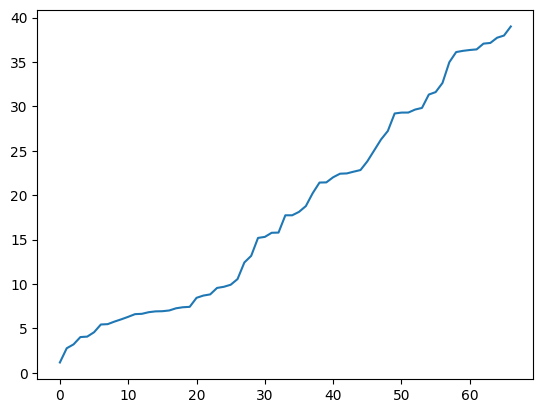

Вывод К ближайших соседей:
X1=91.45, X2=6.0, y=89.08, расстояние=1.16
X1=92.77, X2=5.0, y=86.73, расстояние=2.76
X1=91.97, X2=4.0, y=47.35, расстояние=3.20
X1=90.48, X2=3.0, y=81.85, расстояние=4.02
X1=91.62, X2=3.0, y=66.55, расстояние=4.07

Визуализация К ближайших соседей:


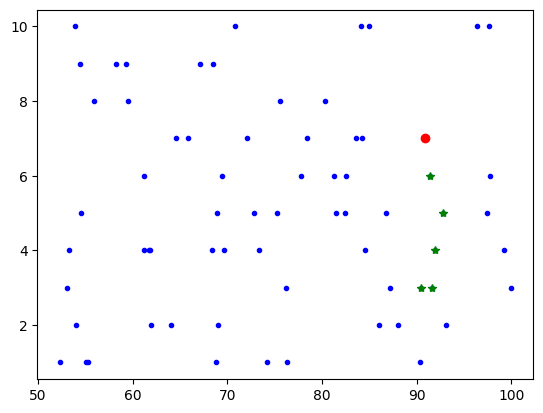


**************************************
Проверяемая точка:  [51.79, 2.0]
**************************************
Вывод отсортированного списка соседей:
X1=52.33, X2=1.0, y=80.87, расстояние=1.14
X1=53.1, X2=3.0, y=60.23, расстояние=1.65
X1=54.06, X2=2.0, y=67.26, расстояние=2.27
X1=53.25, X2=4.0, y=61.73, расстояние=2.48
X1=55.11, X2=1.0, y=61.7, расстояние=3.47
X1=55.25, X2=1.0, y=69.17, расстояние=3.60
X1=54.57, X2=5.0, y=47.99, расстояние=4.09
X1=55.91, X2=8.0, y=90.57, расстояние=7.28
X1=54.5, X2=9.0, y=54.61, расстояние=7.51
X1=53.92, X2=10.0, y=70.62, расстояние=8.28
X1=58.29, X2=9.0, y=42.88, расстояние=9.55
X1=61.19, X2=4.0, y=68.4, расстояние=9.61
X1=59.55, X2=8.0, y=65.66, расстояние=9.81
X1=61.72, X2=4.0, y=85.9, расстояние=10.13
X1=61.99, X2=2.0, y=93.71, расстояние=10.20
X1=61.82, X2=4.0, y=82.12, расстояние=10.23
X1=61.24, X2=6.0, y=96.42, расстояние=10.26
X1=59.32, X2=9.0, y=67.98, расстояние=10.28
X1=64.1, X2=2.0, y=60.3, расстояние=12.31
X1=64.6, X2=7.0, y=73.52, рассто

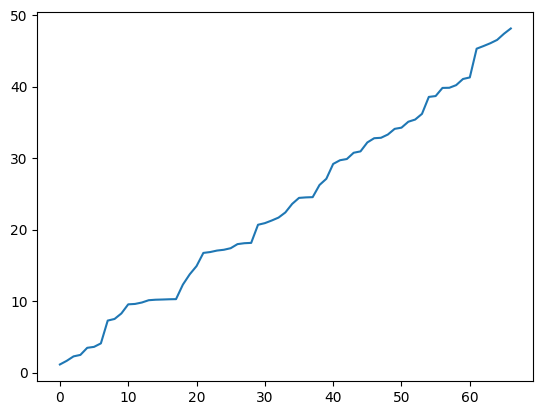

Вывод К ближайших соседей:
X1=52.33, X2=1.0, y=80.87, расстояние=1.14
X1=53.1, X2=3.0, y=60.23, расстояние=1.65
X1=54.06, X2=2.0, y=67.26, расстояние=2.27
X1=53.25, X2=4.0, y=61.73, расстояние=2.48
X1=55.11, X2=1.0, y=61.7, расстояние=3.47

Визуализация К ближайших соседей:


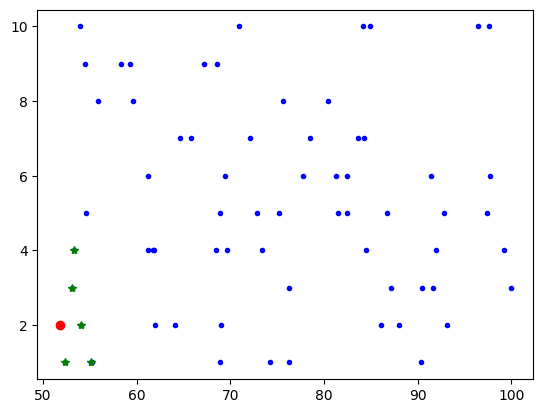


**************************************
Проверяемая точка:  [65.83, 3.0]
**************************************
Вывод отсортированного списка соседей:
X1=64.1, X2=2.0, y=60.3, расстояние=2.00
X1=68.42, X2=4.0, y=52.49, расстояние=2.78
X1=68.98, X2=2.0, y=46.17, расстояние=3.30
X1=68.84, X2=1.0, y=54.69, расстояние=3.61
X1=68.94, X2=5.0, y=88.17, расстояние=3.70
X1=69.66, X2=4.0, y=85.03, расстояние=3.96
X1=61.99, X2=2.0, y=93.71, расстояние=3.97
X1=65.83, X2=7.0, y=42.24, расстояние=4.00
X1=61.82, X2=4.0, y=82.12, расстояние=4.13
X1=64.6, X2=7.0, y=73.52, расстояние=4.18
X1=61.72, X2=4.0, y=85.9, расстояние=4.23
X1=69.45, X2=6.0, y=47.14, расстояние=4.70
X1=61.19, X2=4.0, y=68.4, расстояние=4.75
X1=61.24, X2=6.0, y=96.42, расстояние=5.48
X1=67.14, X2=9.0, y=91.16, расстояние=6.14
X1=68.54, X2=9.0, y=82.18, расстояние=6.58
X1=72.86, X2=5.0, y=66.88, расстояние=7.31
X1=72.1, X2=7.0, y=95.29, расстояние=7.44
X1=73.39, X2=4.0, y=60.54, расстояние=7.63
X1=59.55, X2=8.0, y=65.66, расстояние=

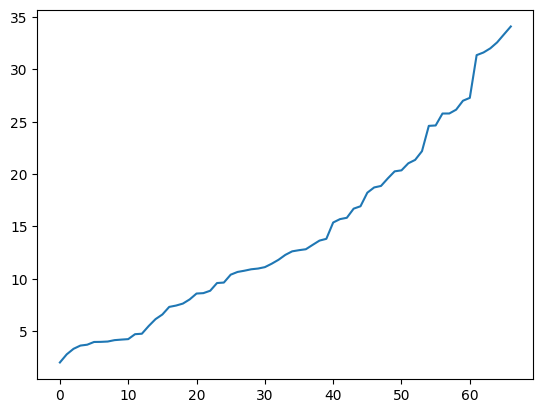

Вывод К ближайших соседей:
X1=64.1, X2=2.0, y=60.3, расстояние=2.00
X1=68.42, X2=4.0, y=52.49, расстояние=2.78
X1=68.98, X2=2.0, y=46.17, расстояние=3.30
X1=68.84, X2=1.0, y=54.69, расстояние=3.61
X1=68.94, X2=5.0, y=88.17, расстояние=3.70

Визуализация К ближайших соседей:


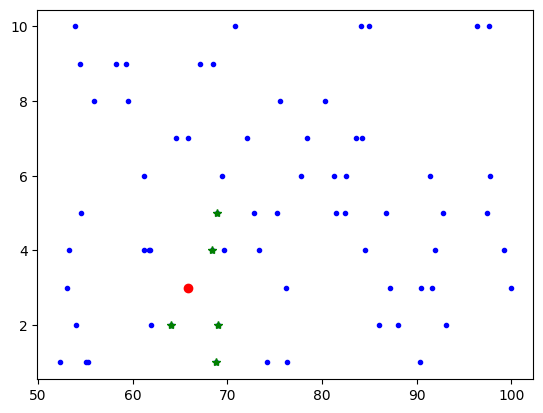


**************************************
Проверяемая точка:  [52.78, 8.0]
**************************************
Вывод отсортированного списка соседей:
X1=54.5, X2=9.0, y=54.61, расстояние=1.99
X1=53.92, X2=10.0, y=70.62, расстояние=2.30
X1=55.91, X2=8.0, y=90.57, расстояние=3.13
X1=54.57, X2=5.0, y=47.99, расстояние=3.49
X1=53.25, X2=4.0, y=61.73, расстояние=4.03
X1=53.1, X2=3.0, y=60.23, расстояние=5.01
X1=58.29, X2=9.0, y=42.88, расстояние=5.60
X1=54.06, X2=2.0, y=67.26, расстояние=6.14
X1=59.32, X2=9.0, y=67.98, расстояние=6.62
X1=59.55, X2=8.0, y=65.66, расстояние=6.77
X1=52.33, X2=1.0, y=80.87, расстояние=7.01
X1=55.11, X2=1.0, y=61.7, расстояние=7.38
X1=55.25, X2=1.0, y=69.17, расстояние=7.42
X1=61.24, X2=6.0, y=96.42, расстояние=8.69
X1=61.19, X2=4.0, y=68.4, расстояние=9.31
X1=61.72, X2=4.0, y=85.9, расстояние=9.79
X1=61.82, X2=4.0, y=82.12, расстояние=9.89
X1=61.99, X2=2.0, y=93.71, расстояние=10.99
X1=64.6, X2=7.0, y=73.52, расстояние=11.86
X1=64.1, X2=2.0, y=60.3, расстояние

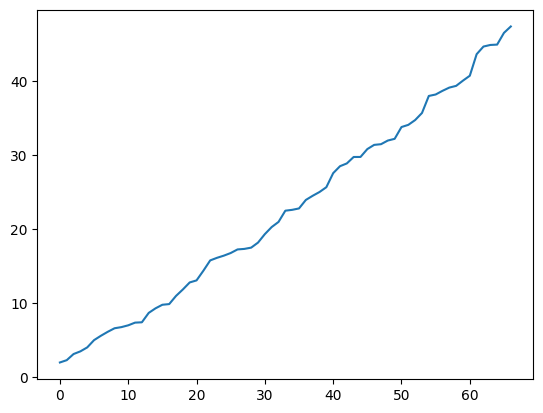

Вывод К ближайших соседей:
X1=54.5, X2=9.0, y=54.61, расстояние=1.99
X1=53.92, X2=10.0, y=70.62, расстояние=2.30
X1=55.91, X2=8.0, y=90.57, расстояние=3.13
X1=54.57, X2=5.0, y=47.99, расстояние=3.49
X1=53.25, X2=4.0, y=61.73, расстояние=4.03

Визуализация К ближайших соседей:


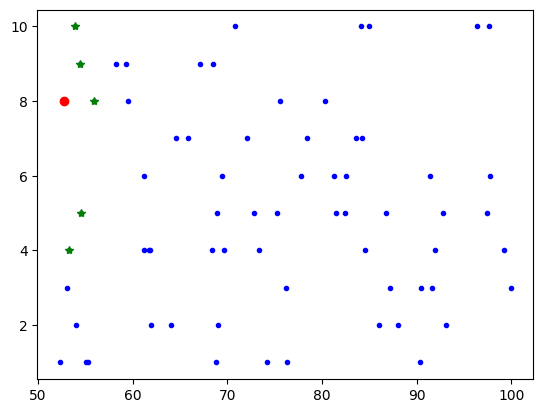


**************************************
Проверяемая точка:  [88.13, 1.0]
**************************************
Вывод отсортированного списка соседей:
X1=88.0, X2=2.0, y=71.62, расстояние=1.01
X1=87.19, X2=3.0, y=51.95, расстояние=2.21
X1=90.36, X2=1.0, y=91.02, расстояние=2.23
X1=86.07, X2=2.0, y=40.65, расстояние=2.29
X1=90.48, X2=3.0, y=81.85, расстояние=3.09
X1=91.62, X2=3.0, y=66.55, расстояние=4.02
X1=86.77, X2=5.0, y=61.55, расстояние=4.22
X1=84.53, X2=4.0, y=40.36, расстояние=4.69
X1=91.97, X2=4.0, y=47.35, расстояние=4.87
X1=93.1, X2=2.0, y=59.93, расстояние=5.07
X1=91.45, X2=6.0, y=89.08, расстояние=6.00
X1=92.77, X2=5.0, y=86.73, расстояние=6.13
X1=82.41, X2=5.0, y=72.51, расстояние=6.98
X1=84.27, X2=7.0, y=52.85, расстояние=7.13
X1=83.61, X2=7.0, y=50.63, расстояние=7.51
X1=82.49, X2=6.0, y=75.34, расстояние=7.54
X1=81.53, X2=5.0, y=98.61, расстояние=7.72
X1=81.24, X2=6.0, y=44.41, расстояние=8.51
X1=84.95, X2=10.0, y=80.29, расстояние=9.55
X1=84.13, X2=10.0, y=75.97, расст

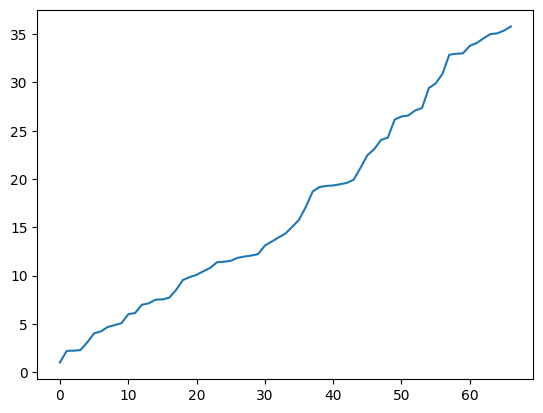

Вывод К ближайших соседей:
X1=88.0, X2=2.0, y=71.62, расстояние=1.01
X1=87.19, X2=3.0, y=51.95, расстояние=2.21
X1=90.36, X2=1.0, y=91.02, расстояние=2.23
X1=86.07, X2=2.0, y=40.65, расстояние=2.29
X1=90.48, X2=3.0, y=81.85, расстояние=3.09

Визуализация К ближайших соседей:


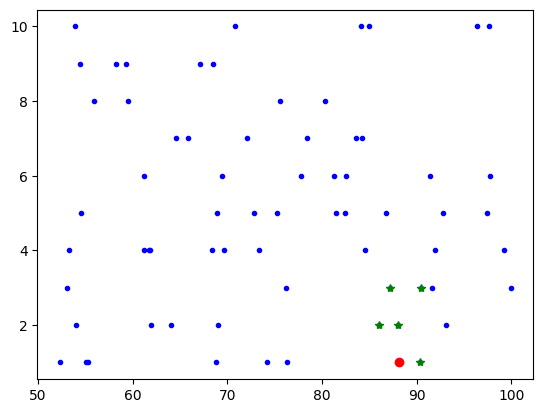


**************************************
Проверяемая точка:  [71.64, 10.0]
**************************************
Вывод отсортированного списка соседей:
X1=70.87, X2=10.0, y=83.21, расстояние=0.77
X1=72.1, X2=7.0, y=95.29, расстояние=3.04
X1=68.54, X2=9.0, y=82.18, расстояние=3.26
X1=75.6, X2=8.0, y=65.5, расстояние=4.44
X1=69.45, X2=6.0, y=47.14, расстояние=4.56
X1=67.14, X2=9.0, y=91.16, расстояние=4.61
X1=72.86, X2=5.0, y=66.88, расстояние=5.15
X1=68.94, X2=5.0, y=88.17, расстояние=5.68
X1=75.21, X2=5.0, y=81.93, расстояние=6.14
X1=73.39, X2=4.0, y=60.54, расстояние=6.25
X1=69.66, X2=4.0, y=85.03, расстояние=6.32
X1=65.83, X2=7.0, y=42.24, расстояние=6.54
X1=68.42, X2=4.0, y=52.49, расстояние=6.81
X1=77.74, X2=6.0, y=52.7, расстояние=7.29
X1=78.45, X2=7.0, y=97.3, расстояние=7.44
X1=64.6, X2=7.0, y=73.52, расстояние=7.65
X1=76.22, X2=3.0, y=86.78, расстояние=8.37
X1=68.98, X2=2.0, y=46.17, расстояние=8.43
X1=80.37, X2=8.0, y=44.17, расстояние=8.96
X1=74.18, X2=1.0, y=89.76, расстояни

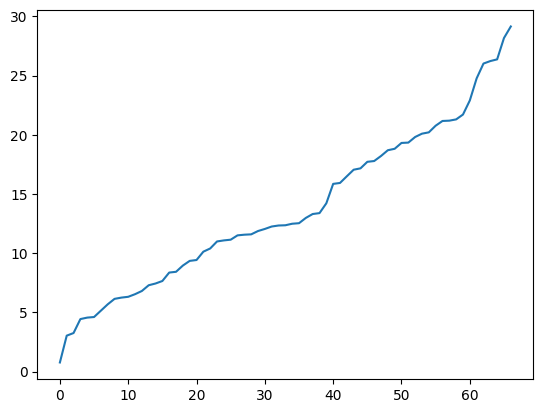

Вывод К ближайших соседей:
X1=70.87, X2=10.0, y=83.21, расстояние=0.77
X1=72.1, X2=7.0, y=95.29, расстояние=3.04
X1=68.54, X2=9.0, y=82.18, расстояние=3.26
X1=75.6, X2=8.0, y=65.5, расстояние=4.44
X1=69.45, X2=6.0, y=47.14, расстояние=4.56

Визуализация К ближайших соседей:


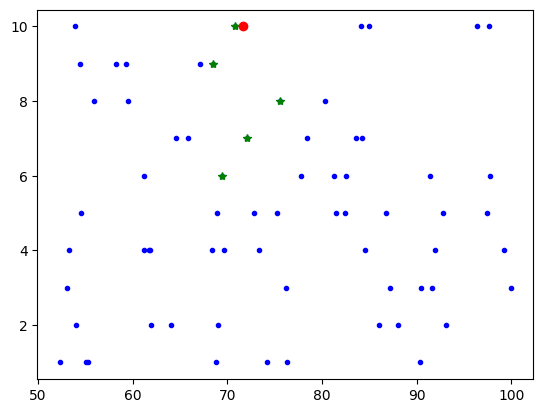


**************************************
Проверяемая точка:  [82.6, 6.0]
**************************************
Вывод отсортированного списка соседей:
X1=82.49, X2=6.0, y=75.34, расстояние=0.11
X1=82.41, X2=5.0, y=72.51, расстояние=1.02
X1=81.24, X2=6.0, y=44.41, расстояние=1.36
X1=83.61, X2=7.0, y=50.63, расстояние=1.42
X1=81.53, X2=5.0, y=98.61, расстояние=1.46
X1=84.27, X2=7.0, y=52.85, расстояние=1.95
X1=84.53, X2=4.0, y=40.36, расстояние=2.78
X1=80.37, X2=8.0, y=44.17, расстояние=3.00
X1=78.45, X2=7.0, y=97.3, расстояние=4.27
X1=84.13, X2=10.0, y=75.97, расстояние=4.28
X1=86.77, X2=5.0, y=61.55, расстояние=4.29
X1=84.95, X2=10.0, y=80.29, расстояние=4.64
X1=77.74, X2=6.0, y=52.7, расстояние=4.86
X1=86.07, X2=2.0, y=40.65, расстояние=5.30
X1=87.19, X2=3.0, y=51.95, расстояние=5.48
X1=88.0, X2=2.0, y=71.62, расстояние=6.72
X1=76.22, X2=3.0, y=86.78, расстояние=7.05
X1=75.6, X2=8.0, y=65.5, расстояние=7.28
X1=75.21, X2=5.0, y=81.93, расстояние=7.46
X1=76.29, X2=1.0, y=67.31, расстояни

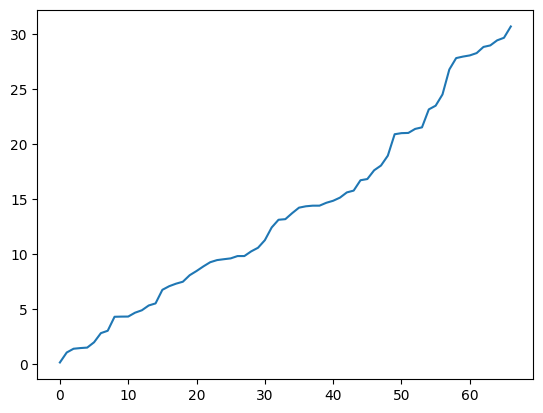

Вывод К ближайших соседей:
X1=82.49, X2=6.0, y=75.34, расстояние=0.11
X1=82.41, X2=5.0, y=72.51, расстояние=1.02
X1=81.24, X2=6.0, y=44.41, расстояние=1.36
X1=83.61, X2=7.0, y=50.63, расстояние=1.42
X1=81.53, X2=5.0, y=98.61, расстояние=1.46

Визуализация К ближайших соседей:


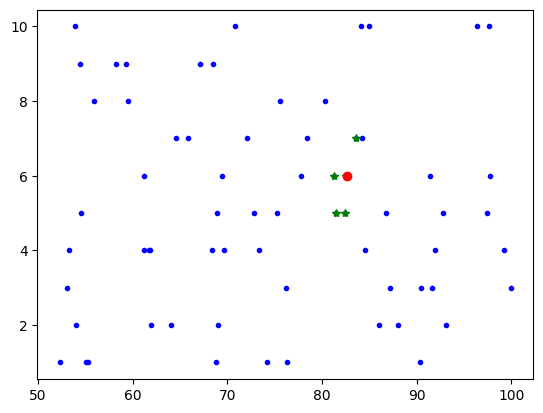


**************************************
Проверяемая точка:  [67.4, 6.0]
**************************************
Вывод отсортированного списка соседей:
X1=68.94, X2=5.0, y=88.17, расстояние=1.84
X1=65.83, X2=7.0, y=42.24, расстояние=1.86
X1=69.45, X2=6.0, y=47.14, расстояние=2.05
X1=68.42, X2=4.0, y=52.49, расстояние=2.25
X1=64.6, X2=7.0, y=73.52, расстояние=2.97
X1=67.14, X2=9.0, y=91.16, расстояние=3.01
X1=69.66, X2=4.0, y=85.03, расстояние=3.02
X1=68.54, X2=9.0, y=82.18, расстояние=3.21
X1=68.98, X2=2.0, y=46.17, расстояние=4.30
X1=72.1, X2=7.0, y=95.29, расстояние=4.81
X1=64.1, X2=2.0, y=60.3, расстояние=5.19
X1=68.84, X2=1.0, y=54.69, расстояние=5.20
X1=70.87, X2=10.0, y=83.21, расстояние=5.30
X1=72.86, X2=5.0, y=66.88, расстояние=5.55
X1=61.82, X2=4.0, y=82.12, расстояние=5.93
X1=61.72, X2=4.0, y=85.9, расстояние=6.02
X1=61.24, X2=6.0, y=96.42, расстояние=6.16
X1=73.39, X2=4.0, y=60.54, расстояние=6.32
X1=61.19, X2=4.0, y=68.4, расстояние=6.52
X1=61.99, X2=2.0, y=93.71, расстояние=

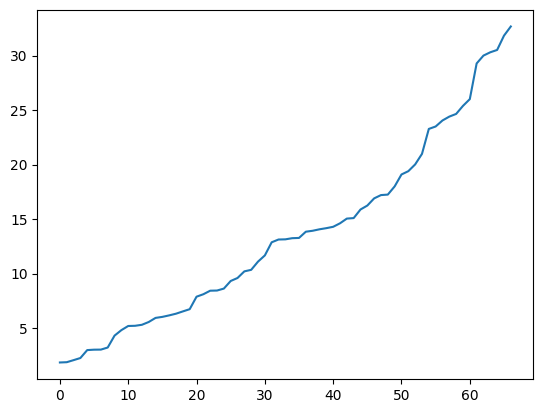

Вывод К ближайших соседей:
X1=68.94, X2=5.0, y=88.17, расстояние=1.84
X1=65.83, X2=7.0, y=42.24, расстояние=1.86
X1=69.45, X2=6.0, y=47.14, расстояние=2.05
X1=68.42, X2=4.0, y=52.49, расстояние=2.25
X1=64.6, X2=7.0, y=73.52, расстояние=2.97

Визуализация К ближайших соседей:


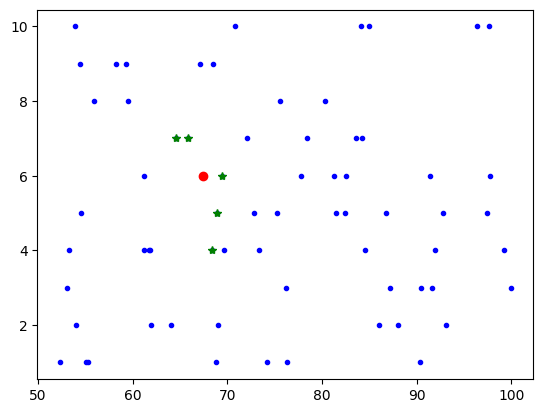


**************************************
Проверяемая точка:  [71.37, 3.0]
**************************************
Вывод отсортированного списка соседей:
X1=69.66, X2=4.0, y=85.03, расстояние=1.98
X1=73.39, X2=4.0, y=60.54, расстояние=2.25
X1=72.86, X2=5.0, y=66.88, расстояние=2.49
X1=68.98, X2=2.0, y=46.17, расстояние=2.59
X1=68.42, X2=4.0, y=52.49, расстояние=3.11
X1=68.94, X2=5.0, y=88.17, расстояние=3.15
X1=68.84, X2=1.0, y=54.69, расстояние=3.23
X1=74.18, X2=1.0, y=89.76, расстояние=3.45
X1=69.45, X2=6.0, y=47.14, расстояние=3.56
X1=72.1, X2=7.0, y=95.29, расстояние=4.07
X1=75.21, X2=5.0, y=81.93, расстояние=4.33
X1=76.22, X2=3.0, y=86.78, расстояние=4.85
X1=76.29, X2=1.0, y=67.31, расстояние=5.31
X1=75.6, X2=8.0, y=65.5, расстояние=6.55
X1=68.54, X2=9.0, y=82.18, расстояние=6.63
X1=65.83, X2=7.0, y=42.24, расстояние=6.83
X1=70.87, X2=10.0, y=83.21, расстояние=7.02
X1=77.74, X2=6.0, y=52.7, расстояние=7.04
X1=64.1, X2=2.0, y=60.3, расстояние=7.34
X1=67.14, X2=9.0, y=91.16, расстояние

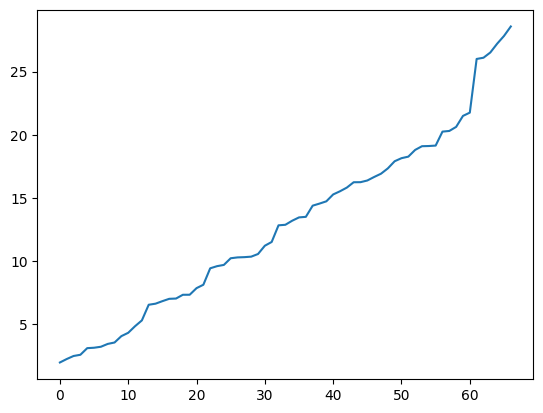

Вывод К ближайших соседей:
X1=69.66, X2=4.0, y=85.03, расстояние=1.98
X1=73.39, X2=4.0, y=60.54, расстояние=2.25
X1=72.86, X2=5.0, y=66.88, расстояние=2.49
X1=68.98, X2=2.0, y=46.17, расстояние=2.59
X1=68.42, X2=4.0, y=52.49, расстояние=3.11

Визуализация К ближайших соседей:


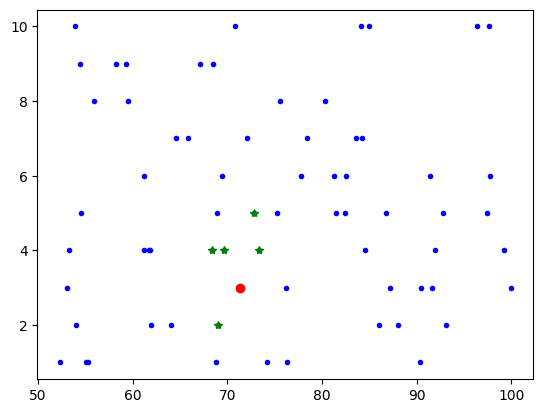


**************************************
Проверяемая точка:  [56.18, 3.0]
**************************************
Вывод отсортированного списка соседей:
X1=55.25, X2=1.0, y=69.17, расстояние=2.21
X1=55.11, X2=1.0, y=61.7, расстояние=2.27
X1=54.06, X2=2.0, y=67.26, расстояние=2.34
X1=54.57, X2=5.0, y=47.99, расстояние=2.57
X1=53.1, X2=3.0, y=60.23, расстояние=3.08
X1=53.25, X2=4.0, y=61.73, расстояние=3.10
X1=52.33, X2=1.0, y=80.87, расстояние=4.34
X1=55.91, X2=8.0, y=90.57, расстояние=5.01
X1=61.19, X2=4.0, y=68.4, расстояние=5.11
X1=61.72, X2=4.0, y=85.9, расстояние=5.63
X1=61.82, X2=4.0, y=82.12, расстояние=5.73
X1=61.24, X2=6.0, y=96.42, расстояние=5.88
X1=61.99, X2=2.0, y=93.71, расстояние=5.90
X1=59.55, X2=8.0, y=65.66, расстояние=6.03
X1=54.5, X2=9.0, y=54.61, расстояние=6.23
X1=58.29, X2=9.0, y=42.88, расстояние=6.36
X1=59.32, X2=9.0, y=67.98, расстояние=6.77
X1=53.92, X2=10.0, y=70.62, расстояние=7.36
X1=64.1, X2=2.0, y=60.3, расстояние=7.98
X1=64.6, X2=7.0, y=73.52, расстояние=9

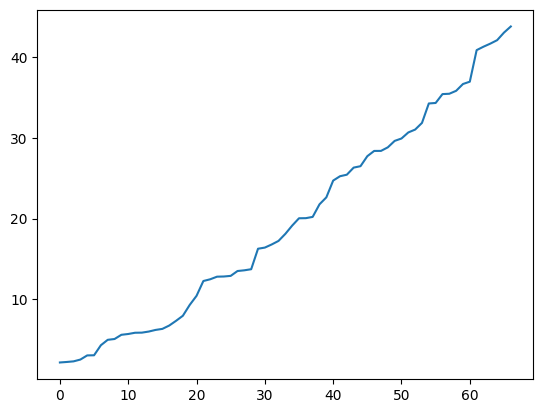

Вывод К ближайших соседей:
X1=55.25, X2=1.0, y=69.17, расстояние=2.21
X1=55.11, X2=1.0, y=61.7, расстояние=2.27
X1=54.06, X2=2.0, y=67.26, расстояние=2.34
X1=54.57, X2=5.0, y=47.99, расстояние=2.57
X1=53.1, X2=3.0, y=60.23, расстояние=3.08

Визуализация К ближайших соседей:


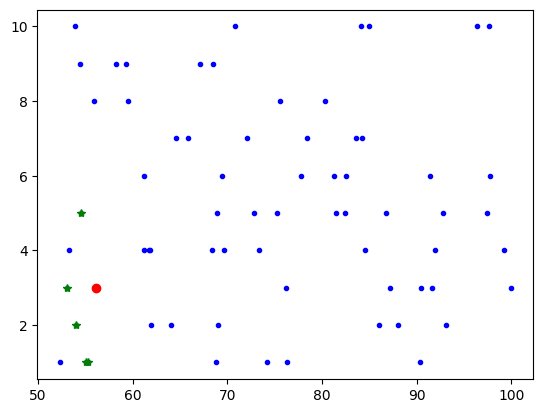


**************************************
Проверяемая точка:  [57.03, 5.0]
**************************************
Вывод отсортированного списка соседей:
X1=54.57, X2=5.0, y=47.99, расстояние=2.46
X1=55.91, X2=8.0, y=90.57, расстояние=3.20
X1=53.25, X2=4.0, y=61.73, расстояние=3.91
X1=59.55, X2=8.0, y=65.66, расстояние=3.92
X1=58.29, X2=9.0, y=42.88, расстояние=4.19
X1=54.06, X2=2.0, y=67.26, расстояние=4.22
X1=61.19, X2=4.0, y=68.4, расстояние=4.28
X1=61.24, X2=6.0, y=96.42, расстояние=4.33
X1=55.25, X2=1.0, y=69.17, расстояние=4.38
X1=53.1, X2=3.0, y=60.23, расстояние=4.41
X1=55.11, X2=1.0, y=61.7, расстояние=4.44
X1=59.32, X2=9.0, y=67.98, расстояние=4.61
X1=54.5, X2=9.0, y=54.61, расстояние=4.73
X1=61.72, X2=4.0, y=85.9, расстояние=4.80
X1=61.82, X2=4.0, y=82.12, расстояние=4.89
X1=61.99, X2=2.0, y=93.71, расстояние=5.80
X1=53.92, X2=10.0, y=70.62, расстояние=5.89
X1=52.33, X2=1.0, y=80.87, расстояние=6.17
X1=64.1, X2=2.0, y=60.3, расстояние=7.68
X1=64.6, X2=7.0, y=73.52, расстояние=7

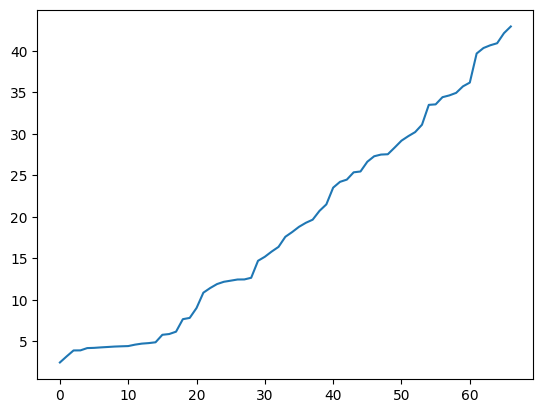

Вывод К ближайших соседей:
X1=54.57, X2=5.0, y=47.99, расстояние=2.46
X1=55.91, X2=8.0, y=90.57, расстояние=3.20
X1=53.25, X2=4.0, y=61.73, расстояние=3.91
X1=59.55, X2=8.0, y=65.66, расстояние=3.92
X1=58.29, X2=9.0, y=42.88, расстояние=4.19

Визуализация К ближайших соседей:


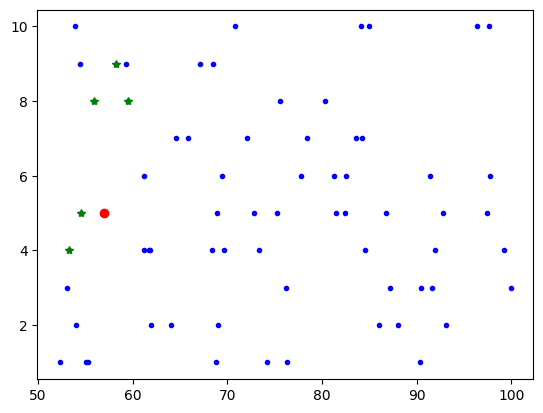


**************************************
Проверяемая точка:  [84.83, 3.0]
**************************************
Вывод отсортированного списка соседей:
X1=84.53, X2=4.0, y=40.36, расстояние=1.04
X1=86.07, X2=2.0, y=40.65, расстояние=1.59
X1=87.19, X2=3.0, y=51.95, расстояние=2.36
X1=86.77, X2=5.0, y=61.55, расстояние=2.79
X1=82.41, X2=5.0, y=72.51, расстояние=3.14
X1=88.0, X2=2.0, y=71.62, расстояние=3.32
X1=82.49, X2=6.0, y=75.34, расстояние=3.80
X1=81.53, X2=5.0, y=98.61, расстояние=3.86
X1=84.27, X2=7.0, y=52.85, расстояние=4.04
X1=83.61, X2=7.0, y=50.63, расстояние=4.18
X1=81.24, X2=6.0, y=44.41, расстояние=4.68
X1=90.48, X2=3.0, y=81.85, расстояние=5.65
X1=90.36, X2=1.0, y=91.02, расстояние=5.88
X1=80.37, X2=8.0, y=44.17, расстояние=6.70
X1=91.62, X2=3.0, y=66.55, расстояние=6.79
X1=84.95, X2=10.0, y=80.29, расстояние=7.00
X1=84.13, X2=10.0, y=75.97, расстояние=7.03
X1=91.97, X2=4.0, y=47.35, расстояние=7.21
X1=91.45, X2=6.0, y=89.08, расстояние=7.27
X1=78.45, X2=7.0, y=97.3, расст

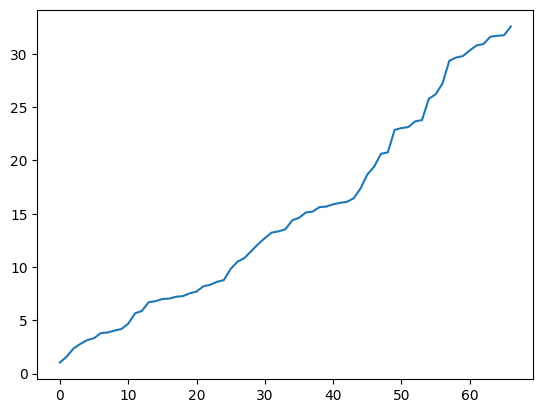

Вывод К ближайших соседей:
X1=84.53, X2=4.0, y=40.36, расстояние=1.04
X1=86.07, X2=2.0, y=40.65, расстояние=1.59
X1=87.19, X2=3.0, y=51.95, расстояние=2.36
X1=86.77, X2=5.0, y=61.55, расстояние=2.79
X1=82.41, X2=5.0, y=72.51, расстояние=3.14

Визуализация К ближайших соседей:


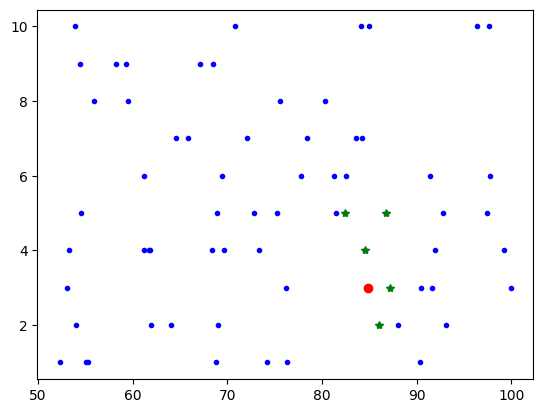


**************************************
Проверяемая точка:  [80.66, 7.0]
**************************************
Вывод отсортированного списка соседей:
X1=80.37, X2=8.0, y=44.17, расстояние=1.04
X1=81.24, X2=6.0, y=44.41, расстояние=1.16
X1=82.49, X2=6.0, y=75.34, расстояние=2.09
X1=81.53, X2=5.0, y=98.61, расстояние=2.18
X1=78.45, X2=7.0, y=97.3, расстояние=2.21
X1=82.41, X2=5.0, y=72.51, расстояние=2.66
X1=83.61, X2=7.0, y=50.63, расстояние=2.95
X1=77.74, X2=6.0, y=52.7, расстояние=3.09
X1=84.27, X2=7.0, y=52.85, расстояние=3.61
X1=84.13, X2=10.0, y=75.97, расстояние=4.59
X1=84.53, X2=4.0, y=40.36, расстояние=4.90
X1=75.6, X2=8.0, y=65.5, расстояние=5.16
X1=84.95, X2=10.0, y=80.29, расстояние=5.23
X1=75.21, X2=5.0, y=81.93, расстояние=5.81
X1=76.22, X2=3.0, y=86.78, расстояние=5.98
X1=86.77, X2=5.0, y=61.55, расстояние=6.43
X1=86.07, X2=2.0, y=40.65, расстояние=7.37
X1=76.29, X2=1.0, y=67.31, расстояние=7.42
X1=87.19, X2=3.0, y=51.95, расстояние=7.66
X1=73.39, X2=4.0, y=60.54, расстоя

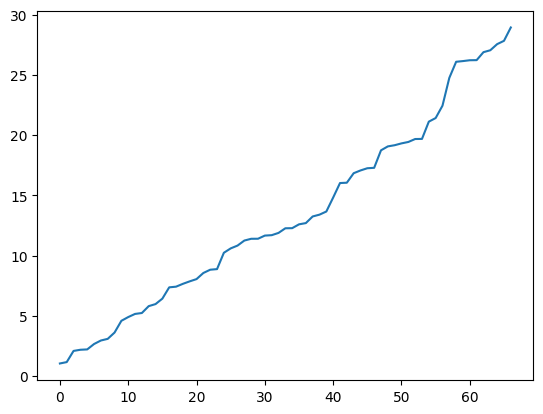

Вывод К ближайших соседей:
X1=80.37, X2=8.0, y=44.17, расстояние=1.04
X1=81.24, X2=6.0, y=44.41, расстояние=1.16
X1=82.49, X2=6.0, y=75.34, расстояние=2.09
X1=81.53, X2=5.0, y=98.61, расстояние=2.18
X1=78.45, X2=7.0, y=97.3, расстояние=2.21

Визуализация К ближайших соседей:


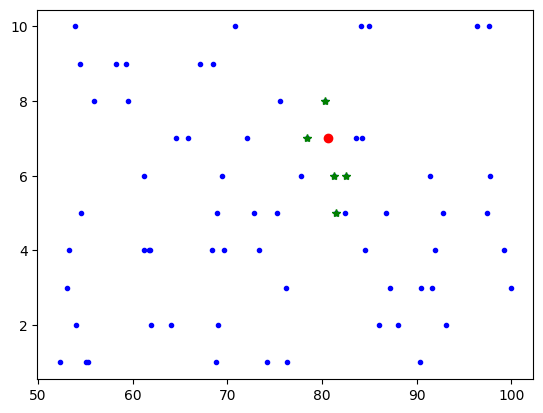


**************************************
Проверяемая точка:  [63.09, 7.0]
**************************************
Вывод отсортированного списка соседей:
X1=64.6, X2=7.0, y=73.52, расстояние=1.51
X1=61.24, X2=6.0, y=96.42, расстояние=2.10
X1=65.83, X2=7.0, y=42.24, расстояние=2.74
X1=61.82, X2=4.0, y=82.12, расстояние=3.26
X1=61.72, X2=4.0, y=85.9, расстояние=3.30
X1=61.19, X2=4.0, y=68.4, расстояние=3.55
X1=59.55, X2=8.0, y=65.66, расстояние=3.68
X1=59.32, X2=9.0, y=67.98, расстояние=4.27
X1=67.14, X2=9.0, y=91.16, расстояние=4.52
X1=64.1, X2=2.0, y=60.3, расстояние=5.10
X1=61.99, X2=2.0, y=93.71, расстояние=5.12
X1=58.29, X2=9.0, y=42.88, расстояние=5.20
X1=68.54, X2=9.0, y=82.18, расстояние=5.81
X1=68.42, X2=4.0, y=52.49, расстояние=6.12
X1=68.94, X2=5.0, y=88.17, расстояние=6.18
X1=69.45, X2=6.0, y=47.14, расстояние=6.44
X1=69.66, X2=4.0, y=85.03, расстояние=7.22
X1=55.91, X2=8.0, y=90.57, расстояние=7.25
X1=68.98, X2=2.0, y=46.17, расстояние=7.73
X1=68.84, X2=1.0, y=54.69, расстояние

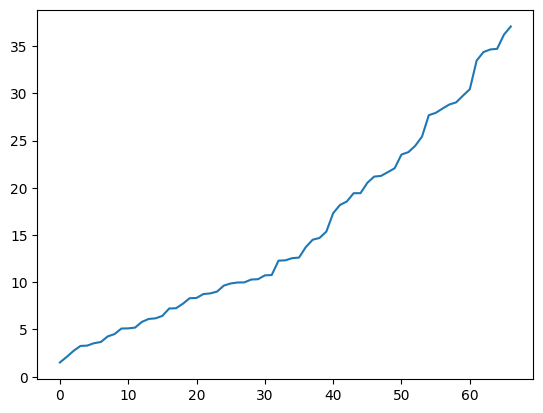

Вывод К ближайших соседей:
X1=64.6, X2=7.0, y=73.52, расстояние=1.51
X1=61.24, X2=6.0, y=96.42, расстояние=2.10
X1=65.83, X2=7.0, y=42.24, расстояние=2.74
X1=61.82, X2=4.0, y=82.12, расстояние=3.26
X1=61.72, X2=4.0, y=85.9, расстояние=3.30

Визуализация К ближайших соседей:


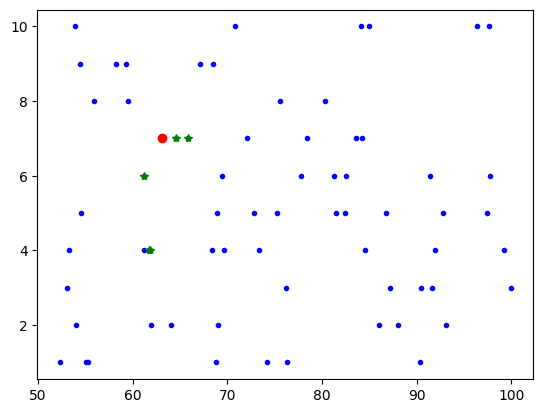

[79.19800000000001,
 67.846,
 69.16400000000002,
 71.96600000000001,
 72.598,
 64.34,
 79.032,
 63.616,
 64.25800000000001,
 74.312,
 66.358,
 60.364,
 65.10400000000001,
 67.418,
 74.664,
 68.3,
 60.712,
 62.222,
 61.27,
 61.766,
 53.403999999999996,
 71.96600000000001,
 76.04]

In [55]:
# Для всех объектов тестовой выборки (регрессия)
simple_knn_regr_prediction = simple_knn_regr.predict(K=5, \
                          prediction_type=PredictionType.REGRESSION, \
                          X_test=data_test[['Attendance (%)','Stress_Level (1-10)']])
simple_knn_regr_prediction


**************************************
Проверяемая точка:  [70.65, 8.0]
**************************************
Вывод отсортированного списка соседей:
X1=72.1, X2=7.0, y=A, расстояние=1.76
X1=70.87, X2=10.0, y=A, расстояние=2.01
X1=69.45, X2=6.0, y=D, расстояние=2.33
X1=68.54, X2=9.0, y=A, расстояние=2.33
X1=68.94, X2=5.0, y=A, расстояние=3.45
X1=67.14, X2=9.0, y=A, расстояние=3.65
X1=72.86, X2=5.0, y=B, расстояние=3.73
X1=69.66, X2=4.0, y=A, расстояние=4.12
X1=68.42, X2=4.0, y=C, расстояние=4.58
X1=73.39, X2=4.0, y=C, расстояние=4.85
X1=65.83, X2=7.0, y=D, расстояние=4.92
X1=75.6, X2=8.0, y=B, расстояние=4.95
X1=75.21, X2=5.0, y=A, расстояние=5.46
X1=64.6, X2=7.0, y=B, расстояние=6.13
X1=68.98, X2=2.0, y=D, расстояние=6.23
X1=68.84, X2=1.0, y=C, расстояние=7.23
X1=77.74, X2=6.0, y=C, расстояние=7.37
X1=76.22, X2=3.0, y=A, расстояние=7.48
X1=74.18, X2=1.0, y=A, расстояние=7.84
X1=78.45, X2=7.0, y=A, расстояние=7.86
X1=64.1, X2=2.0, y=C, расстояние=8.88
X1=76.29, X2=1.0, y=B, расстояние

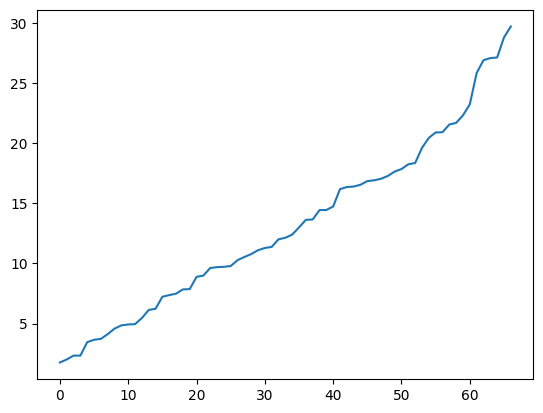

Вывод К ближайших соседей:
X1=72.1, X2=7.0, y=A, расстояние=1.76
X1=70.87, X2=10.0, y=A, расстояние=2.01
X1=69.45, X2=6.0, y=D, расстояние=2.33

Визуализация К ближайших соседей:


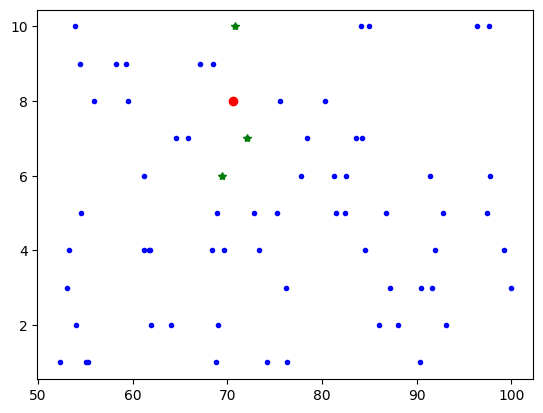

Классы, соответствующие К ближайшим соседям:
класс=A, количество элементов=2
класс=D, количество элементов=1

**************************************
Проверяемая точка:  [56.93, 1.0]
**************************************
Вывод отсортированного списка соседей:
X1=55.25, X2=1.0, y=B, расстояние=1.68
X1=55.11, X2=1.0, y=C, расстояние=1.82
X1=54.06, X2=2.0, y=B, расстояние=3.04
X1=53.1, X2=3.0, y=C, расстояние=4.32
X1=52.33, X2=1.0, y=A, расстояние=4.60
X1=54.57, X2=5.0, y=D, расстояние=4.64
X1=53.25, X2=4.0, y=C, расстояние=4.75
X1=61.99, X2=2.0, y=A, расстояние=5.16
X1=61.19, X2=4.0, y=B, расстояние=5.21
X1=61.72, X2=4.0, y=A, расстояние=5.65
X1=61.82, X2=4.0, y=A, расстояние=5.74
X1=61.24, X2=6.0, y=A, расстояние=6.60
X1=55.91, X2=8.0, y=A, расстояние=7.07
X1=64.1, X2=2.0, y=C, расстояние=7.24
X1=59.55, X2=8.0, y=B, расстояние=7.47
X1=58.29, X2=9.0, y=D, расстояние=8.11
X1=59.32, X2=9.0, y=B, расстояние=8.35
X1=54.5, X2=9.0, y=C, расстояние=8.36
X1=53.92, X2=10.0, y=B, расстояние=9.49
X

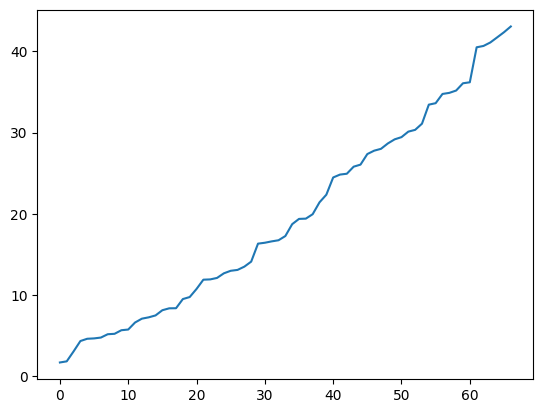

Вывод К ближайших соседей:
X1=55.25, X2=1.0, y=B, расстояние=1.68
X1=55.11, X2=1.0, y=C, расстояние=1.82
X1=54.06, X2=2.0, y=B, расстояние=3.04

Визуализация К ближайших соседей:


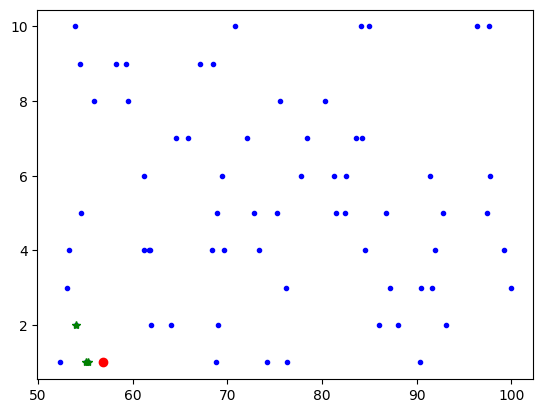

Классы, соответствующие К ближайшим соседям:
класс=B, количество элементов=2
класс=C, количество элементов=1

**************************************
Проверяемая точка:  [62.83, 8.0]
**************************************
Вывод отсортированного списка соседей:
X1=64.6, X2=7.0, y=B, расстояние=2.03
X1=61.24, X2=6.0, y=A, расстояние=2.56
X1=65.83, X2=7.0, y=D, расстояние=3.16
X1=59.55, X2=8.0, y=B, расстояние=3.28
X1=59.32, X2=9.0, y=B, расстояние=3.65
X1=61.82, X2=4.0, y=A, расстояние=4.13
X1=61.72, X2=4.0, y=A, расстояние=4.15
X1=61.19, X2=4.0, y=B, расстояние=4.32
X1=67.14, X2=9.0, y=A, расстояние=4.42
X1=58.29, X2=9.0, y=D, расстояние=4.65
X1=68.54, X2=9.0, y=A, расстояние=5.80
X1=61.99, X2=2.0, y=A, расстояние=6.06
X1=64.1, X2=2.0, y=C, расстояние=6.13
X1=68.94, X2=5.0, y=A, расстояние=6.81
X1=68.42, X2=4.0, y=C, расстояние=6.87
X1=69.45, X2=6.0, y=D, расстояние=6.92
X1=55.91, X2=8.0, y=A, расстояние=6.92
X1=69.66, X2=4.0, y=A, расстояние=7.92
X1=70.87, X2=10.0, y=A, расстояние=8.29


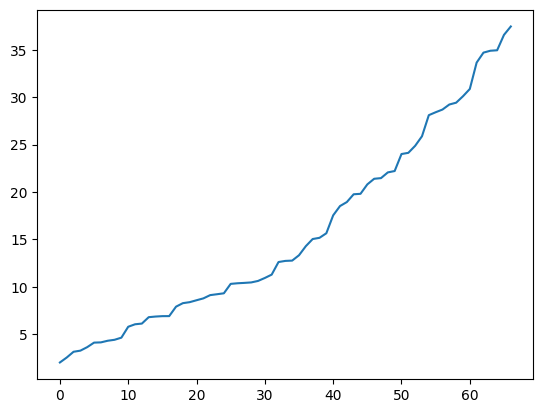

Вывод К ближайших соседей:
X1=64.6, X2=7.0, y=B, расстояние=2.03
X1=61.24, X2=6.0, y=A, расстояние=2.56
X1=65.83, X2=7.0, y=D, расстояние=3.16

Визуализация К ближайших соседей:


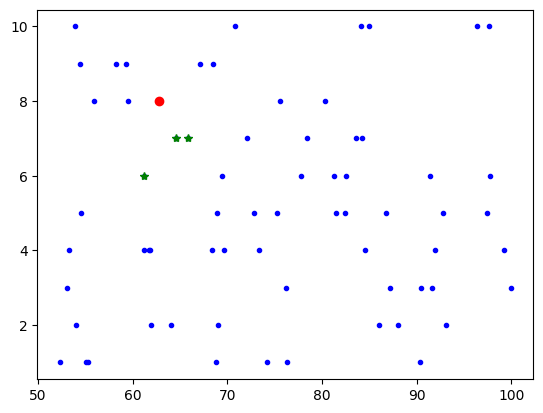

Классы, соответствующие К ближайшим соседям:
класс=A, количество элементов=1
класс=B, количество элементов=1
класс=D, количество элементов=1

**************************************
Проверяемая точка:  [80.9, 7.0]
**************************************
Вывод отсортированного списка соседей:
X1=81.24, X2=6.0, y=D, расстояние=1.06
X1=80.37, X2=8.0, y=D, расстояние=1.13
X1=82.49, X2=6.0, y=B, расстояние=1.88
X1=81.53, X2=5.0, y=A, расстояние=2.10
X1=78.45, X2=7.0, y=A, расстояние=2.45
X1=82.41, X2=5.0, y=B, расстояние=2.51
X1=83.61, X2=7.0, y=C, расстояние=2.71
X1=77.74, X2=6.0, y=C, расстояние=3.31
X1=84.27, X2=7.0, y=C, расстояние=3.37
X1=84.13, X2=10.0, y=B, расстояние=4.41
X1=84.53, X2=4.0, y=D, расстояние=4.71
X1=84.95, X2=10.0, y=A, расстояние=5.04
X1=75.6, X2=8.0, y=B, расстояние=5.39
X1=75.21, X2=5.0, y=A, расстояние=6.03
X1=76.22, X2=3.0, y=A, расстояние=6.16
X1=86.77, X2=5.0, y=C, расстояние=6.20
X1=86.07, X2=2.0, y=D, расстояние=7.19
X1=87.19, X2=3.0, y=C, расстояние=7.45
X1=76.

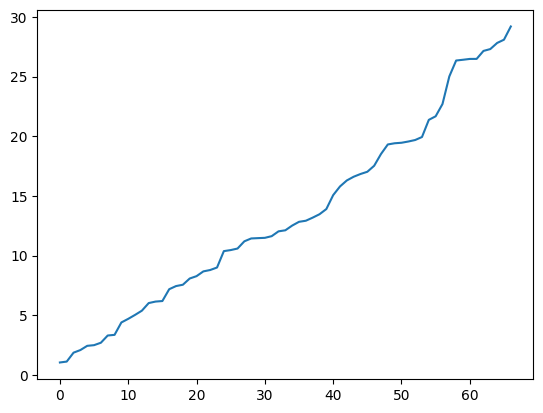

Вывод К ближайших соседей:
X1=81.24, X2=6.0, y=D, расстояние=1.06
X1=80.37, X2=8.0, y=D, расстояние=1.13
X1=82.49, X2=6.0, y=B, расстояние=1.88

Визуализация К ближайших соседей:


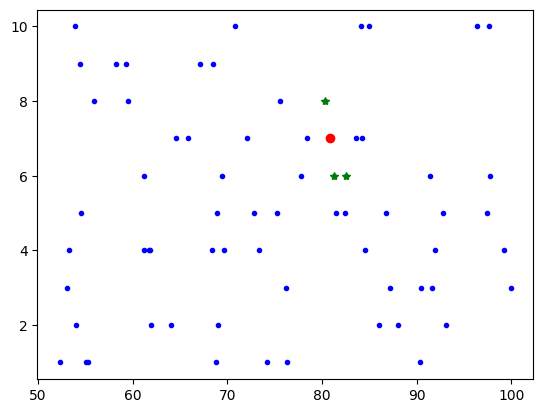

Классы, соответствующие К ближайшим соседям:
класс=D, количество элементов=2
класс=B, количество элементов=1

**************************************
Проверяемая точка:  [89.47, 2.0]
**************************************
Вывод отсортированного списка соседей:
X1=90.36, X2=1.0, y=A, расстояние=1.34
X1=90.48, X2=3.0, y=A, расстояние=1.42
X1=88.0, X2=2.0, y=B, расстояние=1.47
X1=91.62, X2=3.0, y=B, расстояние=2.37
X1=87.19, X2=3.0, y=C, расстояние=2.49
X1=91.97, X2=4.0, y=D, расстояние=3.20
X1=86.07, X2=2.0, y=D, расстояние=3.40
X1=93.1, X2=2.0, y=C, расстояние=3.63
X1=86.77, X2=5.0, y=C, расстояние=4.04
X1=92.77, X2=5.0, y=A, расстояние=4.46
X1=91.45, X2=6.0, y=A, расстояние=4.46
X1=84.53, X2=4.0, y=D, расстояние=5.33
X1=84.27, X2=7.0, y=C, расстояние=7.21
X1=82.41, X2=5.0, y=B, расстояние=7.67
X1=83.61, X2=7.0, y=C, расстояние=7.70
X1=82.49, X2=6.0, y=B, расстояние=8.04
X1=97.39, X2=5.0, y=B, расстояние=8.47
X1=81.53, X2=5.0, y=A, расстояние=8.49
X1=81.24, X2=6.0, y=D, расстояние=9.15
X

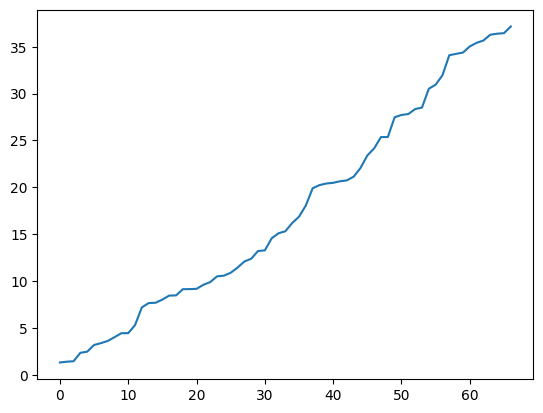

Вывод К ближайших соседей:
X1=90.36, X2=1.0, y=A, расстояние=1.34
X1=90.48, X2=3.0, y=A, расстояние=1.42
X1=88.0, X2=2.0, y=B, расстояние=1.47

Визуализация К ближайших соседей:


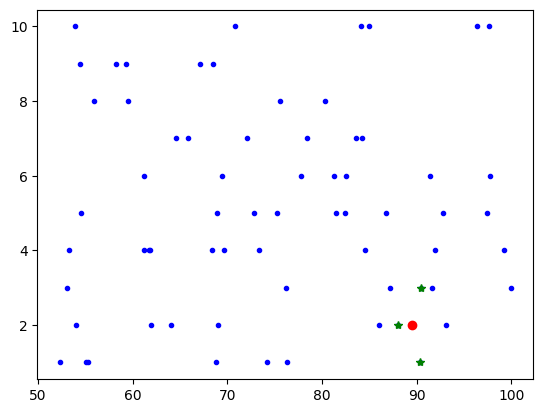

Классы, соответствующие К ближайшим соседям:
класс=A, количество элементов=2
класс=B, количество элементов=1

**************************************
Проверяемая точка:  [57.94, 10.0]
**************************************
Вывод отсортированного списка соседей:
X1=58.29, X2=9.0, y=D, расстояние=1.06
X1=59.32, X2=9.0, y=B, расстояние=1.70
X1=59.55, X2=8.0, y=B, расстояние=2.57
X1=55.91, X2=8.0, y=A, расстояние=2.85
X1=54.5, X2=9.0, y=C, расстояние=3.58
X1=53.92, X2=10.0, y=B, расстояние=4.02
X1=61.24, X2=6.0, y=A, расстояние=5.19
X1=54.57, X2=5.0, y=D, расстояние=6.03
X1=61.19, X2=4.0, y=B, расстояние=6.82
X1=61.72, X2=4.0, y=A, расстояние=7.09
X1=61.82, X2=4.0, y=A, расстояние=7.15
X1=64.6, X2=7.0, y=B, расстояние=7.30
X1=53.25, X2=4.0, y=C, расстояние=7.62
X1=65.83, X2=7.0, y=D, расстояние=8.44
X1=53.1, X2=3.0, y=C, расстояние=8.51
X1=54.06, X2=2.0, y=B, расстояние=8.89
X1=61.99, X2=2.0, y=A, расстояние=8.97
X1=67.14, X2=9.0, y=A, расстояние=9.25
X1=55.25, X2=1.0, y=B, расстояние=9.39


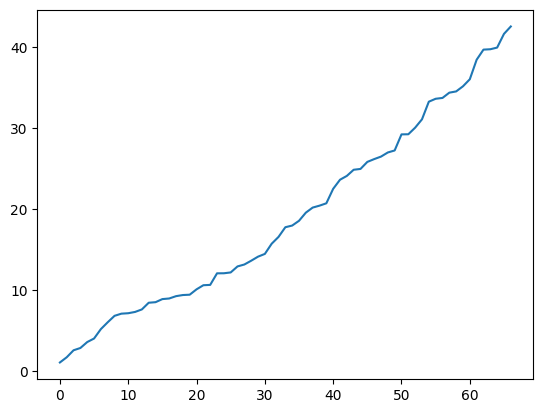

Вывод К ближайших соседей:
X1=58.29, X2=9.0, y=D, расстояние=1.06
X1=59.32, X2=9.0, y=B, расстояние=1.70
X1=59.55, X2=8.0, y=B, расстояние=2.57

Визуализация К ближайших соседей:


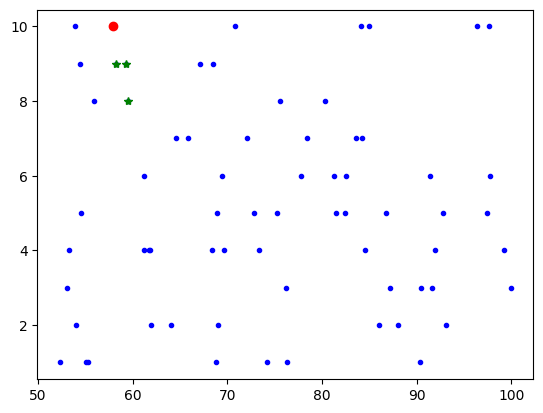

Классы, соответствующие К ближайшим соседям:
класс=B, количество элементов=2
класс=D, количество элементов=1

**************************************
Проверяемая точка:  [78.97, 1.0]
**************************************
Вывод отсортированного списка соседей:
X1=76.29, X2=1.0, y=B, расстояние=2.68
X1=76.22, X2=3.0, y=A, расстояние=3.40
X1=81.53, X2=5.0, y=A, расстояние=4.75
X1=74.18, X2=1.0, y=A, расстояние=4.79
X1=77.74, X2=6.0, y=C, расстояние=5.15
X1=82.41, X2=5.0, y=B, расстояние=5.28
X1=75.21, X2=5.0, y=A, расстояние=5.49
X1=81.24, X2=6.0, y=D, расстояние=5.49
X1=78.45, X2=7.0, y=A, расстояние=6.02
X1=82.49, X2=6.0, y=B, расстояние=6.11
X1=84.53, X2=4.0, y=D, расстояние=6.32
X1=73.39, X2=4.0, y=C, расстояние=6.34
X1=80.37, X2=8.0, y=D, расстояние=7.14
X1=86.07, X2=2.0, y=D, расстояние=7.17
X1=72.86, X2=5.0, y=B, расстояние=7.30
X1=83.61, X2=7.0, y=C, расстояние=7.58
X1=75.6, X2=8.0, y=B, расстояние=7.77
X1=84.27, X2=7.0, y=C, расстояние=8.01
X1=87.19, X2=3.0, y=C, расстояние=8.46


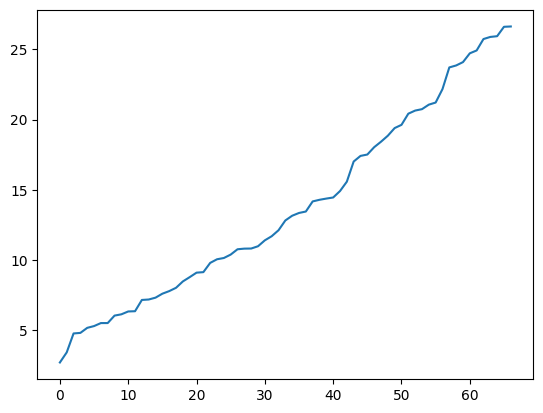

Вывод К ближайших соседей:
X1=76.29, X2=1.0, y=B, расстояние=2.68
X1=76.22, X2=3.0, y=A, расстояние=3.40
X1=81.53, X2=5.0, y=A, расстояние=4.75

Визуализация К ближайших соседей:


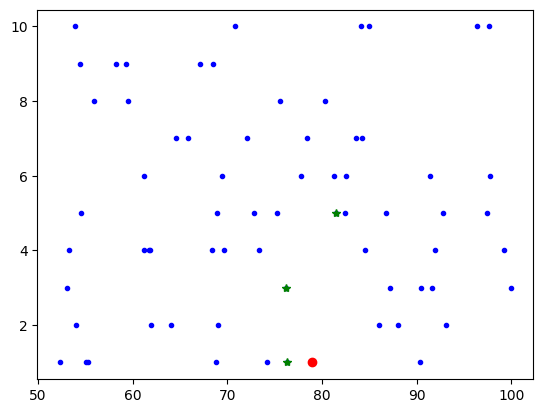

Классы, соответствующие К ближайшим соседям:
класс=A, количество элементов=2
класс=B, количество элементов=1

**************************************
Проверяемая точка:  [50.59, 4.0]
**************************************
Вывод отсортированного списка соседей:
X1=53.25, X2=4.0, y=C, расстояние=2.66
X1=53.1, X2=3.0, y=C, расстояние=2.70
X1=52.33, X2=1.0, y=A, расстояние=3.47
X1=54.06, X2=2.0, y=B, расстояние=4.01
X1=54.57, X2=5.0, y=D, расстояние=4.10
X1=55.11, X2=1.0, y=C, расстояние=5.42
X1=55.25, X2=1.0, y=B, расстояние=5.54
X1=54.5, X2=9.0, y=C, расстояние=6.35
X1=55.91, X2=8.0, y=A, расстояние=6.66
X1=53.92, X2=10.0, y=B, расстояние=6.86
X1=58.29, X2=9.0, y=D, расстояние=9.18
X1=59.55, X2=8.0, y=B, расстояние=9.81
X1=59.32, X2=9.0, y=B, расстояние=10.06
X1=61.19, X2=4.0, y=B, расстояние=10.60
X1=61.24, X2=6.0, y=A, расстояние=10.84
X1=61.72, X2=4.0, y=A, расстояние=11.13
X1=61.82, X2=4.0, y=A, расстояние=11.23
X1=61.99, X2=2.0, y=A, расстояние=11.57
X1=64.1, X2=2.0, y=C, расстояние=

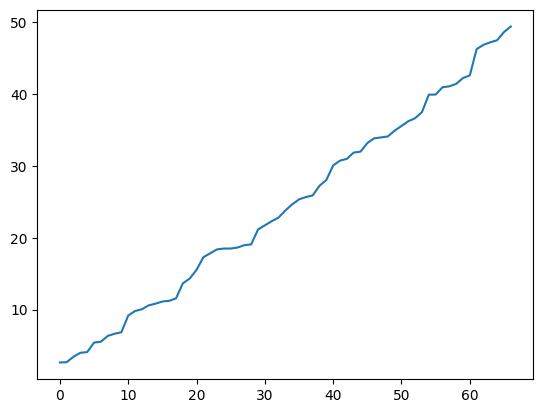

Вывод К ближайших соседей:
X1=53.25, X2=4.0, y=C, расстояние=2.66
X1=53.1, X2=3.0, y=C, расстояние=2.70
X1=52.33, X2=1.0, y=A, расстояние=3.47

Визуализация К ближайших соседей:


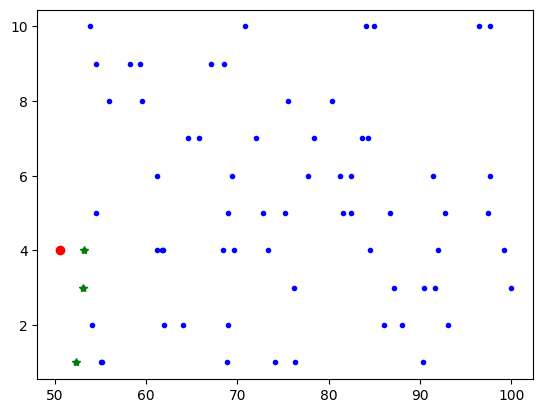

Классы, соответствующие К ближайшим соседям:
класс=C, количество элементов=2
класс=A, количество элементов=1

**************************************
Проверяемая точка:  [86.35, 8.0]
**************************************
Вывод отсортированного списка соседей:
X1=84.27, X2=7.0, y=C, расстояние=2.31
X1=84.95, X2=10.0, y=A, расстояние=2.44
X1=83.61, X2=7.0, y=C, расстояние=2.92
X1=84.13, X2=10.0, y=B, расстояние=2.99
X1=86.77, X2=5.0, y=C, расстояние=3.03
X1=82.49, X2=6.0, y=B, расстояние=4.35
X1=84.53, X2=4.0, y=D, расстояние=4.39
X1=82.41, X2=5.0, y=B, расстояние=4.95
X1=87.19, X2=3.0, y=C, расстояние=5.07
X1=91.45, X2=6.0, y=A, расстояние=5.48
X1=81.24, X2=6.0, y=D, расстояние=5.49
X1=81.53, X2=5.0, y=A, расстояние=5.68
X1=80.37, X2=8.0, y=D, расстояние=5.98
X1=86.07, X2=2.0, y=D, расстояние=6.01
X1=88.0, X2=2.0, y=B, расстояние=6.22
X1=90.48, X2=3.0, y=A, расстояние=6.49
X1=91.97, X2=4.0, y=D, расстояние=6.90
X1=92.77, X2=5.0, y=A, расстояние=7.09
X1=91.62, X2=3.0, y=B, расстояние=7.2

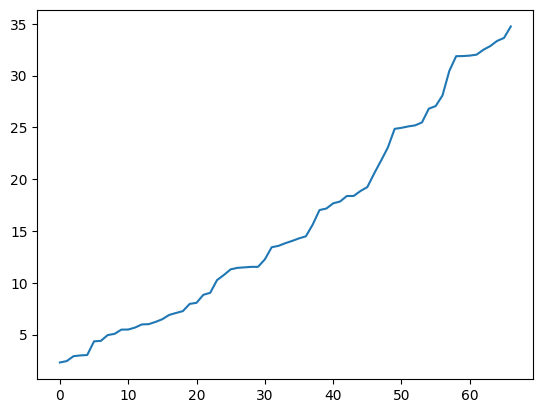

Вывод К ближайших соседей:
X1=84.27, X2=7.0, y=C, расстояние=2.31
X1=84.95, X2=10.0, y=A, расстояние=2.44
X1=83.61, X2=7.0, y=C, расстояние=2.92

Визуализация К ближайших соседей:


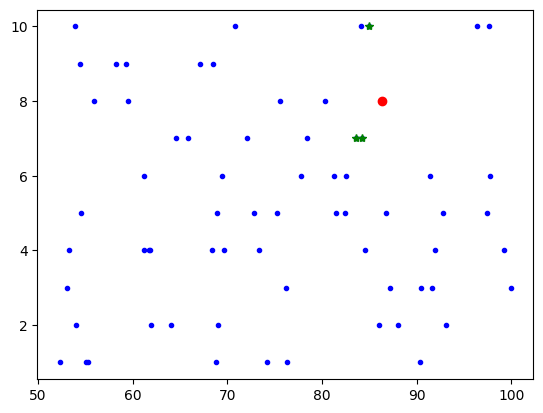

Классы, соответствующие К ближайшим соседям:
класс=C, количество элементов=2
класс=A, количество элементов=1

**************************************
Проверяемая точка:  [90.87, 7.0]
**************************************
Вывод отсортированного списка соседей:
X1=91.45, X2=6.0, y=A, расстояние=1.16
X1=92.77, X2=5.0, y=A, расстояние=2.76
X1=91.97, X2=4.0, y=D, расстояние=3.20
X1=90.48, X2=3.0, y=A, расстояние=4.02
X1=91.62, X2=3.0, y=B, расстояние=4.07
X1=86.77, X2=5.0, y=C, расстояние=4.56
X1=87.19, X2=3.0, y=C, расстояние=5.44
X1=93.1, X2=2.0, y=C, расстояние=5.47
X1=88.0, X2=2.0, y=B, расстояние=5.77
X1=90.36, X2=1.0, y=A, расстояние=6.02
X1=96.41, X2=10.0, y=C, расстояние=6.30
X1=84.27, X2=7.0, y=C, расстояние=6.60
X1=84.95, X2=10.0, y=A, расстояние=6.64
X1=97.39, X2=5.0, y=B, расстояние=6.82
X1=97.71, X2=6.0, y=D, расстояние=6.91
X1=86.07, X2=2.0, y=D, расстояние=6.93
X1=84.53, X2=4.0, y=D, расстояние=7.01
X1=83.61, X2=7.0, y=C, расстояние=7.26
X1=84.13, X2=10.0, y=B, расстояние=7.3

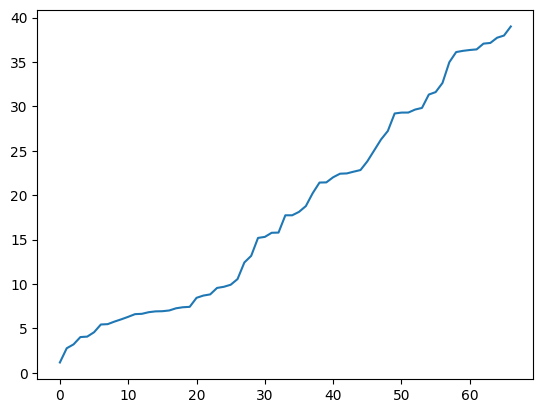

Вывод К ближайших соседей:
X1=91.45, X2=6.0, y=A, расстояние=1.16
X1=92.77, X2=5.0, y=A, расстояние=2.76
X1=91.97, X2=4.0, y=D, расстояние=3.20

Визуализация К ближайших соседей:


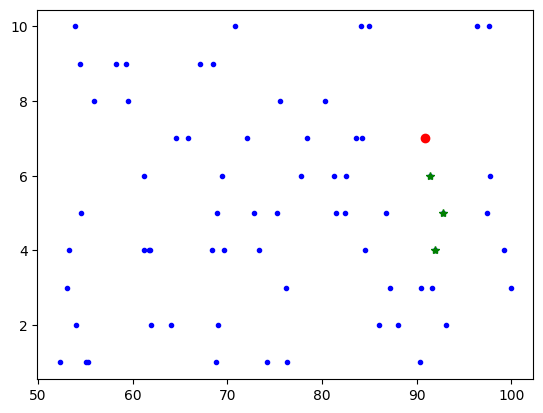

Классы, соответствующие К ближайшим соседям:
класс=A, количество элементов=2
класс=D, количество элементов=1

**************************************
Проверяемая точка:  [51.79, 2.0]
**************************************
Вывод отсортированного списка соседей:
X1=52.33, X2=1.0, y=A, расстояние=1.14
X1=53.1, X2=3.0, y=C, расстояние=1.65
X1=54.06, X2=2.0, y=B, расстояние=2.27
X1=53.25, X2=4.0, y=C, расстояние=2.48
X1=55.11, X2=1.0, y=C, расстояние=3.47
X1=55.25, X2=1.0, y=B, расстояние=3.60
X1=54.57, X2=5.0, y=D, расстояние=4.09
X1=55.91, X2=8.0, y=A, расстояние=7.28
X1=54.5, X2=9.0, y=C, расстояние=7.51
X1=53.92, X2=10.0, y=B, расстояние=8.28
X1=58.29, X2=9.0, y=D, расстояние=9.55
X1=61.19, X2=4.0, y=B, расстояние=9.61
X1=59.55, X2=8.0, y=B, расстояние=9.81
X1=61.72, X2=4.0, y=A, расстояние=10.13
X1=61.99, X2=2.0, y=A, расстояние=10.20
X1=61.82, X2=4.0, y=A, расстояние=10.23
X1=61.24, X2=6.0, y=A, расстояние=10.26
X1=59.32, X2=9.0, y=B, расстояние=10.28
X1=64.1, X2=2.0, y=C, расстояние=1

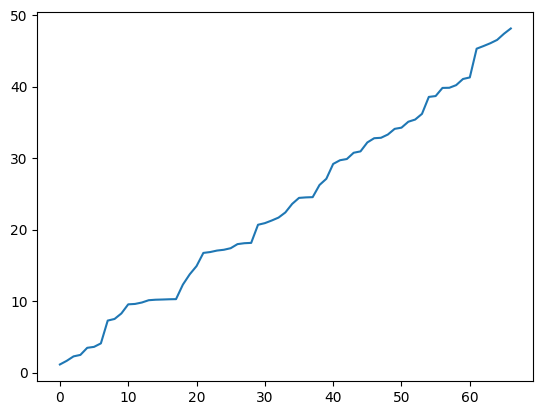

Вывод К ближайших соседей:
X1=52.33, X2=1.0, y=A, расстояние=1.14
X1=53.1, X2=3.0, y=C, расстояние=1.65
X1=54.06, X2=2.0, y=B, расстояние=2.27

Визуализация К ближайших соседей:


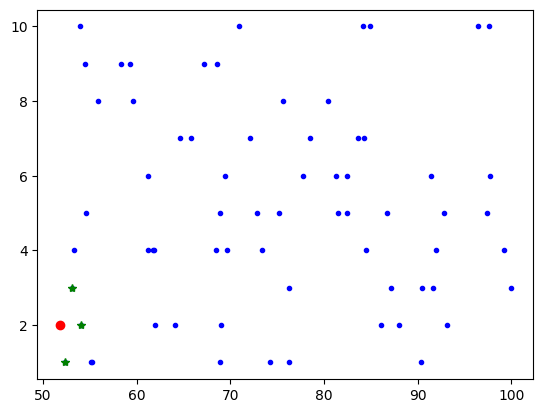

Классы, соответствующие К ближайшим соседям:
класс=A, количество элементов=1
класс=B, количество элементов=1
класс=C, количество элементов=1

**************************************
Проверяемая точка:  [65.83, 3.0]
**************************************
Вывод отсортированного списка соседей:
X1=64.1, X2=2.0, y=C, расстояние=2.00
X1=68.42, X2=4.0, y=C, расстояние=2.78
X1=68.98, X2=2.0, y=D, расстояние=3.30
X1=68.84, X2=1.0, y=C, расстояние=3.61
X1=68.94, X2=5.0, y=A, расстояние=3.70
X1=69.66, X2=4.0, y=A, расстояние=3.96
X1=61.99, X2=2.0, y=A, расстояние=3.97
X1=65.83, X2=7.0, y=D, расстояние=4.00
X1=61.82, X2=4.0, y=A, расстояние=4.13
X1=64.6, X2=7.0, y=B, расстояние=4.18
X1=61.72, X2=4.0, y=A, расстояние=4.23
X1=69.45, X2=6.0, y=D, расстояние=4.70
X1=61.19, X2=4.0, y=B, расстояние=4.75
X1=61.24, X2=6.0, y=A, расстояние=5.48
X1=67.14, X2=9.0, y=A, расстояние=6.14
X1=68.54, X2=9.0, y=A, расстояние=6.58
X1=72.86, X2=5.0, y=B, расстояние=7.31
X1=72.1, X2=7.0, y=A, расстояние=7.44
X1=73.39,

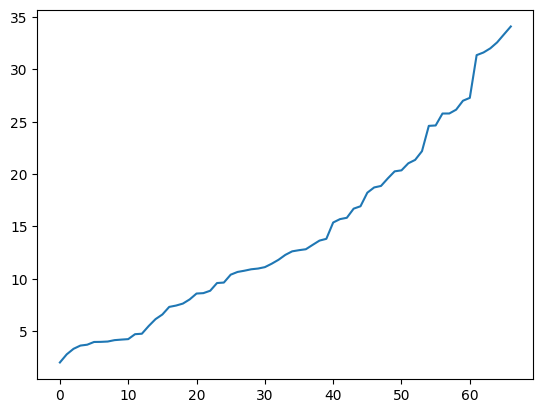

Вывод К ближайших соседей:
X1=64.1, X2=2.0, y=C, расстояние=2.00
X1=68.42, X2=4.0, y=C, расстояние=2.78
X1=68.98, X2=2.0, y=D, расстояние=3.30

Визуализация К ближайших соседей:


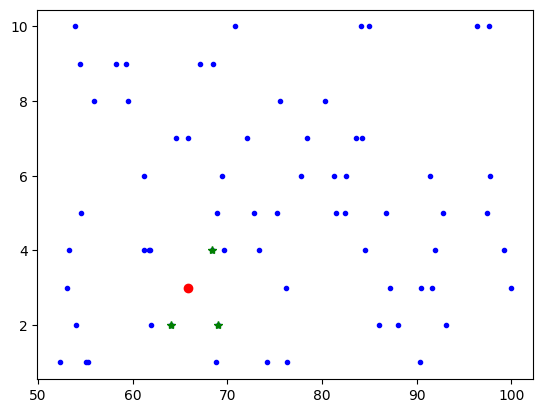

Классы, соответствующие К ближайшим соседям:
класс=C, количество элементов=2
класс=D, количество элементов=1

**************************************
Проверяемая точка:  [52.78, 8.0]
**************************************
Вывод отсортированного списка соседей:
X1=54.5, X2=9.0, y=C, расстояние=1.99
X1=53.92, X2=10.0, y=B, расстояние=2.30
X1=55.91, X2=8.0, y=A, расстояние=3.13
X1=54.57, X2=5.0, y=D, расстояние=3.49
X1=53.25, X2=4.0, y=C, расстояние=4.03
X1=53.1, X2=3.0, y=C, расстояние=5.01
X1=58.29, X2=9.0, y=D, расстояние=5.60
X1=54.06, X2=2.0, y=B, расстояние=6.14
X1=59.32, X2=9.0, y=B, расстояние=6.62
X1=59.55, X2=8.0, y=B, расстояние=6.77
X1=52.33, X2=1.0, y=A, расстояние=7.01
X1=55.11, X2=1.0, y=C, расстояние=7.38
X1=55.25, X2=1.0, y=B, расстояние=7.42
X1=61.24, X2=6.0, y=A, расстояние=8.69
X1=61.19, X2=4.0, y=B, расстояние=9.31
X1=61.72, X2=4.0, y=A, расстояние=9.79
X1=61.82, X2=4.0, y=A, расстояние=9.89
X1=61.99, X2=2.0, y=A, расстояние=10.99
X1=64.6, X2=7.0, y=B, расстояние=11.86

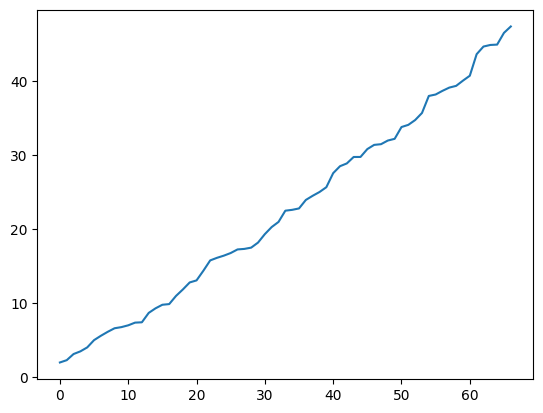

Вывод К ближайших соседей:
X1=54.5, X2=9.0, y=C, расстояние=1.99
X1=53.92, X2=10.0, y=B, расстояние=2.30
X1=55.91, X2=8.0, y=A, расстояние=3.13

Визуализация К ближайших соседей:


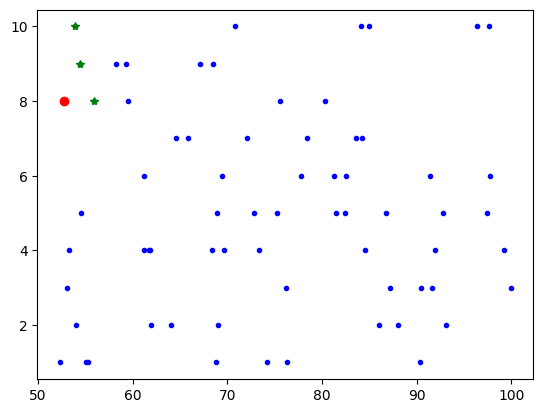

Классы, соответствующие К ближайшим соседям:
класс=A, количество элементов=1
класс=B, количество элементов=1
класс=C, количество элементов=1

**************************************
Проверяемая точка:  [88.13, 1.0]
**************************************
Вывод отсортированного списка соседей:
X1=88.0, X2=2.0, y=B, расстояние=1.01
X1=87.19, X2=3.0, y=C, расстояние=2.21
X1=90.36, X2=1.0, y=A, расстояние=2.23
X1=86.07, X2=2.0, y=D, расстояние=2.29
X1=90.48, X2=3.0, y=A, расстояние=3.09
X1=91.62, X2=3.0, y=B, расстояние=4.02
X1=86.77, X2=5.0, y=C, расстояние=4.22
X1=84.53, X2=4.0, y=D, расстояние=4.69
X1=91.97, X2=4.0, y=D, расстояние=4.87
X1=93.1, X2=2.0, y=C, расстояние=5.07
X1=91.45, X2=6.0, y=A, расстояние=6.00
X1=92.77, X2=5.0, y=A, расстояние=6.13
X1=82.41, X2=5.0, y=B, расстояние=6.98
X1=84.27, X2=7.0, y=C, расстояние=7.13
X1=83.61, X2=7.0, y=C, расстояние=7.51
X1=82.49, X2=6.0, y=B, расстояние=7.54
X1=81.53, X2=5.0, y=A, расстояние=7.72
X1=81.24, X2=6.0, y=D, расстояние=8.51
X1=84.95

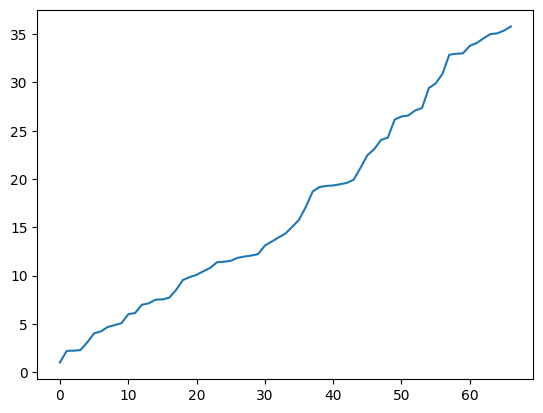

Вывод К ближайших соседей:
X1=88.0, X2=2.0, y=B, расстояние=1.01
X1=87.19, X2=3.0, y=C, расстояние=2.21
X1=90.36, X2=1.0, y=A, расстояние=2.23

Визуализация К ближайших соседей:


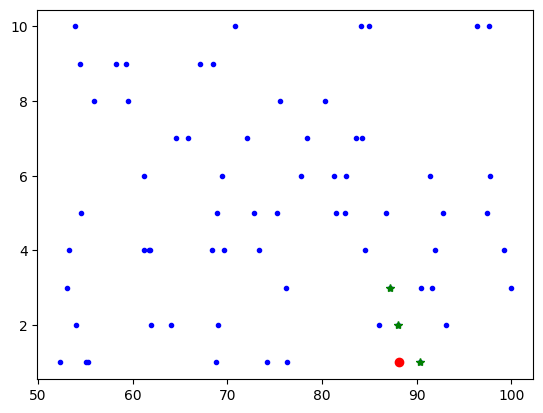

Классы, соответствующие К ближайшим соседям:
класс=A, количество элементов=1
класс=B, количество элементов=1
класс=C, количество элементов=1

**************************************
Проверяемая точка:  [71.64, 10.0]
**************************************
Вывод отсортированного списка соседей:
X1=70.87, X2=10.0, y=A, расстояние=0.77
X1=72.1, X2=7.0, y=A, расстояние=3.04
X1=68.54, X2=9.0, y=A, расстояние=3.26
X1=75.6, X2=8.0, y=B, расстояние=4.44
X1=69.45, X2=6.0, y=D, расстояние=4.56
X1=67.14, X2=9.0, y=A, расстояние=4.61
X1=72.86, X2=5.0, y=B, расстояние=5.15
X1=68.94, X2=5.0, y=A, расстояние=5.68
X1=75.21, X2=5.0, y=A, расстояние=6.14
X1=73.39, X2=4.0, y=C, расстояние=6.25
X1=69.66, X2=4.0, y=A, расстояние=6.32
X1=65.83, X2=7.0, y=D, расстояние=6.54
X1=68.42, X2=4.0, y=C, расстояние=6.81
X1=77.74, X2=6.0, y=C, расстояние=7.29
X1=78.45, X2=7.0, y=A, расстояние=7.44
X1=64.6, X2=7.0, y=B, расстояние=7.65
X1=76.22, X2=3.0, y=A, расстояние=8.37
X1=68.98, X2=2.0, y=D, расстояние=8.43
X1=80.3

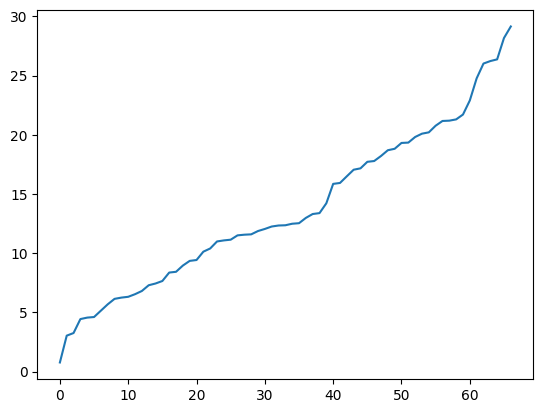

Вывод К ближайших соседей:
X1=70.87, X2=10.0, y=A, расстояние=0.77
X1=72.1, X2=7.0, y=A, расстояние=3.04
X1=68.54, X2=9.0, y=A, расстояние=3.26

Визуализация К ближайших соседей:


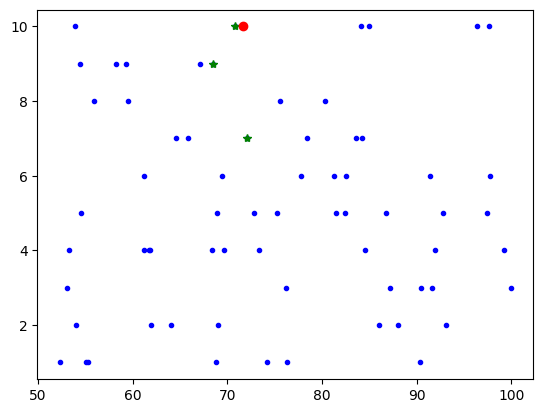

Классы, соответствующие К ближайшим соседям:
класс=A, количество элементов=3

**************************************
Проверяемая точка:  [82.6, 6.0]
**************************************
Вывод отсортированного списка соседей:
X1=82.49, X2=6.0, y=B, расстояние=0.11
X1=82.41, X2=5.0, y=B, расстояние=1.02
X1=81.24, X2=6.0, y=D, расстояние=1.36
X1=83.61, X2=7.0, y=C, расстояние=1.42
X1=81.53, X2=5.0, y=A, расстояние=1.46
X1=84.27, X2=7.0, y=C, расстояние=1.95
X1=84.53, X2=4.0, y=D, расстояние=2.78
X1=80.37, X2=8.0, y=D, расстояние=3.00
X1=78.45, X2=7.0, y=A, расстояние=4.27
X1=84.13, X2=10.0, y=B, расстояние=4.28
X1=86.77, X2=5.0, y=C, расстояние=4.29
X1=84.95, X2=10.0, y=A, расстояние=4.64
X1=77.74, X2=6.0, y=C, расстояние=4.86
X1=86.07, X2=2.0, y=D, расстояние=5.30
X1=87.19, X2=3.0, y=C, расстояние=5.48
X1=88.0, X2=2.0, y=B, расстояние=6.72
X1=76.22, X2=3.0, y=A, расстояние=7.05
X1=75.6, X2=8.0, y=B, расстояние=7.28
X1=75.21, X2=5.0, y=A, расстояние=7.46
X1=76.29, X2=1.0, y=B, расстояни

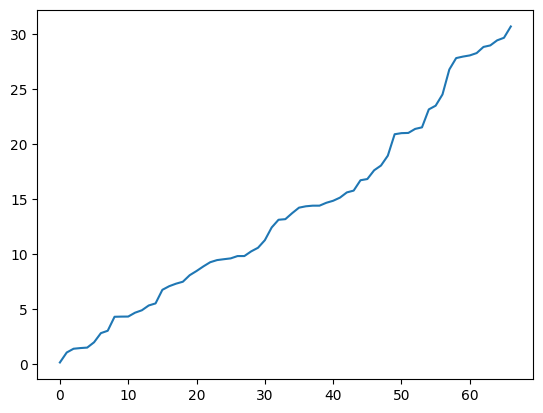

Вывод К ближайших соседей:
X1=82.49, X2=6.0, y=B, расстояние=0.11
X1=82.41, X2=5.0, y=B, расстояние=1.02
X1=81.24, X2=6.0, y=D, расстояние=1.36

Визуализация К ближайших соседей:


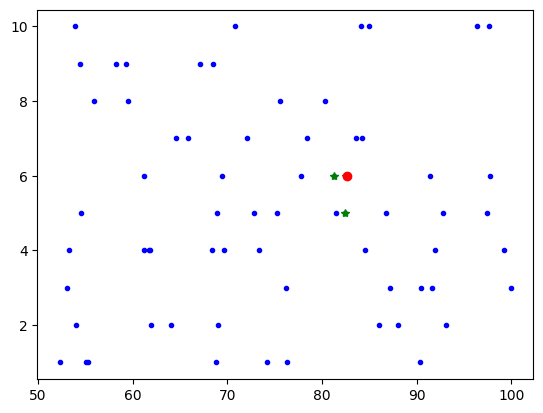

Классы, соответствующие К ближайшим соседям:
класс=B, количество элементов=2
класс=D, количество элементов=1

**************************************
Проверяемая точка:  [67.4, 6.0]
**************************************
Вывод отсортированного списка соседей:
X1=68.94, X2=5.0, y=A, расстояние=1.84
X1=65.83, X2=7.0, y=D, расстояние=1.86
X1=69.45, X2=6.0, y=D, расстояние=2.05
X1=68.42, X2=4.0, y=C, расстояние=2.25
X1=64.6, X2=7.0, y=B, расстояние=2.97
X1=67.14, X2=9.0, y=A, расстояние=3.01
X1=69.66, X2=4.0, y=A, расстояние=3.02
X1=68.54, X2=9.0, y=A, расстояние=3.21
X1=68.98, X2=2.0, y=D, расстояние=4.30
X1=72.1, X2=7.0, y=A, расстояние=4.81
X1=64.1, X2=2.0, y=C, расстояние=5.19
X1=68.84, X2=1.0, y=C, расстояние=5.20
X1=70.87, X2=10.0, y=A, расстояние=5.30
X1=72.86, X2=5.0, y=B, расстояние=5.55
X1=61.82, X2=4.0, y=A, расстояние=5.93
X1=61.72, X2=4.0, y=A, расстояние=6.02
X1=61.24, X2=6.0, y=A, расстояние=6.16
X1=73.39, X2=4.0, y=C, расстояние=6.32
X1=61.19, X2=4.0, y=B, расстояние=6.52
X1

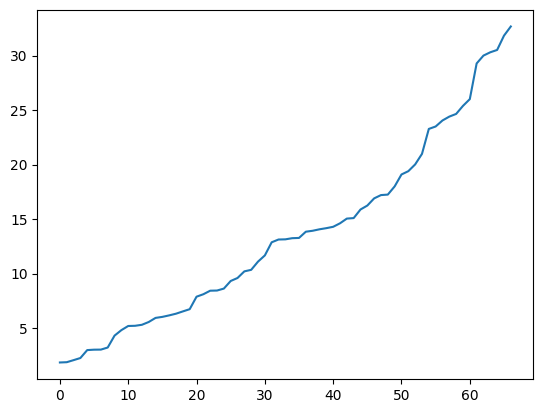

Вывод К ближайших соседей:
X1=68.94, X2=5.0, y=A, расстояние=1.84
X1=65.83, X2=7.0, y=D, расстояние=1.86
X1=69.45, X2=6.0, y=D, расстояние=2.05

Визуализация К ближайших соседей:


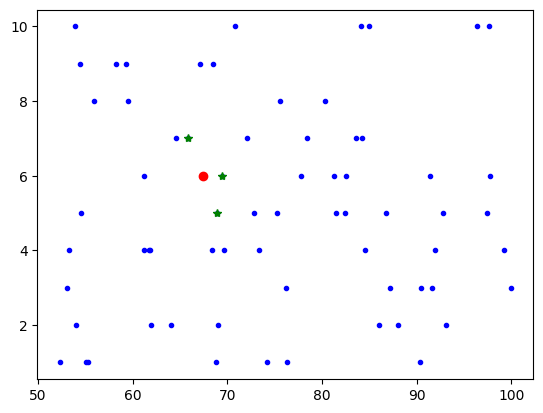

Классы, соответствующие К ближайшим соседям:
класс=D, количество элементов=2
класс=A, количество элементов=1

**************************************
Проверяемая точка:  [71.37, 3.0]
**************************************
Вывод отсортированного списка соседей:
X1=69.66, X2=4.0, y=A, расстояние=1.98
X1=73.39, X2=4.0, y=C, расстояние=2.25
X1=72.86, X2=5.0, y=B, расстояние=2.49
X1=68.98, X2=2.0, y=D, расстояние=2.59
X1=68.42, X2=4.0, y=C, расстояние=3.11
X1=68.94, X2=5.0, y=A, расстояние=3.15
X1=68.84, X2=1.0, y=C, расстояние=3.23
X1=74.18, X2=1.0, y=A, расстояние=3.45
X1=69.45, X2=6.0, y=D, расстояние=3.56
X1=72.1, X2=7.0, y=A, расстояние=4.07
X1=75.21, X2=5.0, y=A, расстояние=4.33
X1=76.22, X2=3.0, y=A, расстояние=4.85
X1=76.29, X2=1.0, y=B, расстояние=5.31
X1=75.6, X2=8.0, y=B, расстояние=6.55
X1=68.54, X2=9.0, y=A, расстояние=6.63
X1=65.83, X2=7.0, y=D, расстояние=6.83
X1=70.87, X2=10.0, y=A, расстояние=7.02
X1=77.74, X2=6.0, y=C, расстояние=7.04
X1=64.1, X2=2.0, y=C, расстояние=7.34
X

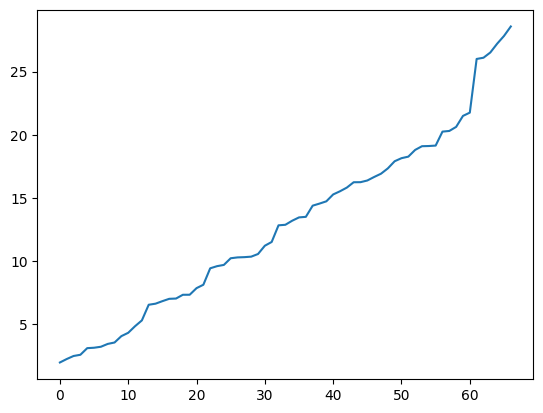

Вывод К ближайших соседей:
X1=69.66, X2=4.0, y=A, расстояние=1.98
X1=73.39, X2=4.0, y=C, расстояние=2.25
X1=72.86, X2=5.0, y=B, расстояние=2.49

Визуализация К ближайших соседей:


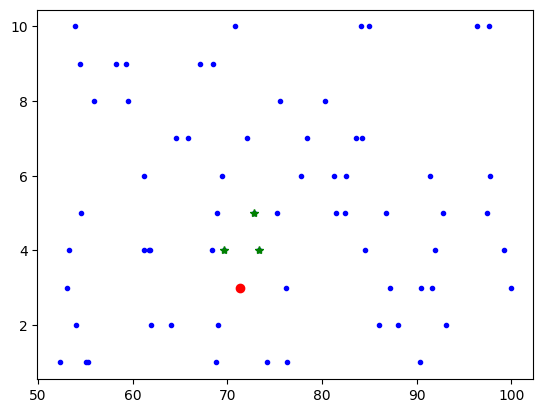

Классы, соответствующие К ближайшим соседям:
класс=A, количество элементов=1
класс=B, количество элементов=1
класс=C, количество элементов=1

**************************************
Проверяемая точка:  [56.18, 3.0]
**************************************
Вывод отсортированного списка соседей:
X1=55.25, X2=1.0, y=B, расстояние=2.21
X1=55.11, X2=1.0, y=C, расстояние=2.27
X1=54.06, X2=2.0, y=B, расстояние=2.34
X1=54.57, X2=5.0, y=D, расстояние=2.57
X1=53.1, X2=3.0, y=C, расстояние=3.08
X1=53.25, X2=4.0, y=C, расстояние=3.10
X1=52.33, X2=1.0, y=A, расстояние=4.34
X1=55.91, X2=8.0, y=A, расстояние=5.01
X1=61.19, X2=4.0, y=B, расстояние=5.11
X1=61.72, X2=4.0, y=A, расстояние=5.63
X1=61.82, X2=4.0, y=A, расстояние=5.73
X1=61.24, X2=6.0, y=A, расстояние=5.88
X1=61.99, X2=2.0, y=A, расстояние=5.90
X1=59.55, X2=8.0, y=B, расстояние=6.03
X1=54.5, X2=9.0, y=C, расстояние=6.23
X1=58.29, X2=9.0, y=D, расстояние=6.36
X1=59.32, X2=9.0, y=B, расстояние=6.77
X1=53.92, X2=10.0, y=B, расстояние=7.36
X1=64.1

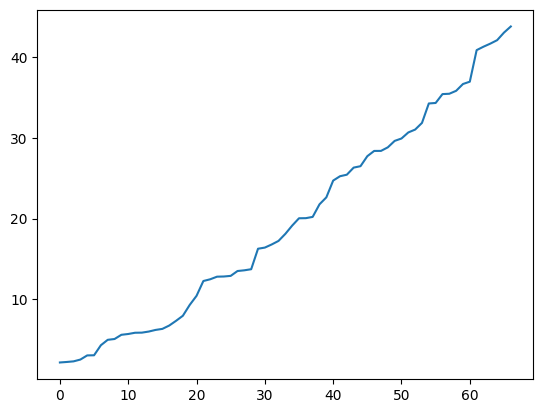

Вывод К ближайших соседей:
X1=55.25, X2=1.0, y=B, расстояние=2.21
X1=55.11, X2=1.0, y=C, расстояние=2.27
X1=54.06, X2=2.0, y=B, расстояние=2.34

Визуализация К ближайших соседей:


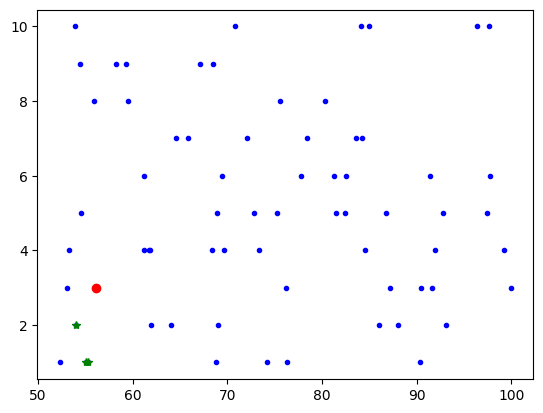

Классы, соответствующие К ближайшим соседям:
класс=B, количество элементов=2
класс=C, количество элементов=1

**************************************
Проверяемая точка:  [57.03, 5.0]
**************************************
Вывод отсортированного списка соседей:
X1=54.57, X2=5.0, y=D, расстояние=2.46
X1=55.91, X2=8.0, y=A, расстояние=3.20
X1=53.25, X2=4.0, y=C, расстояние=3.91
X1=59.55, X2=8.0, y=B, расстояние=3.92
X1=58.29, X2=9.0, y=D, расстояние=4.19
X1=54.06, X2=2.0, y=B, расстояние=4.22
X1=61.19, X2=4.0, y=B, расстояние=4.28
X1=61.24, X2=6.0, y=A, расстояние=4.33
X1=55.25, X2=1.0, y=B, расстояние=4.38
X1=53.1, X2=3.0, y=C, расстояние=4.41
X1=55.11, X2=1.0, y=C, расстояние=4.44
X1=59.32, X2=9.0, y=B, расстояние=4.61
X1=54.5, X2=9.0, y=C, расстояние=4.73
X1=61.72, X2=4.0, y=A, расстояние=4.80
X1=61.82, X2=4.0, y=A, расстояние=4.89
X1=61.99, X2=2.0, y=A, расстояние=5.80
X1=53.92, X2=10.0, y=B, расстояние=5.89
X1=52.33, X2=1.0, y=A, расстояние=6.17
X1=64.1, X2=2.0, y=C, расстояние=7.68
X

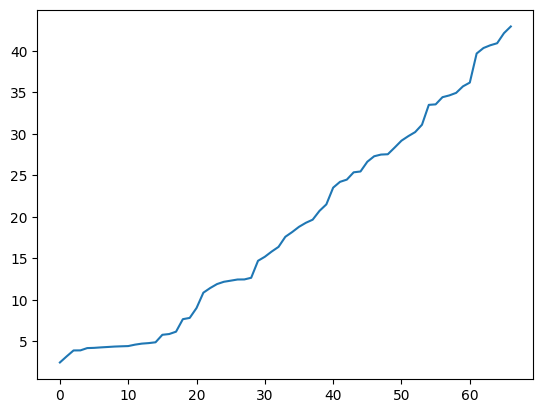

Вывод К ближайших соседей:
X1=54.57, X2=5.0, y=D, расстояние=2.46
X1=55.91, X2=8.0, y=A, расстояние=3.20
X1=53.25, X2=4.0, y=C, расстояние=3.91

Визуализация К ближайших соседей:


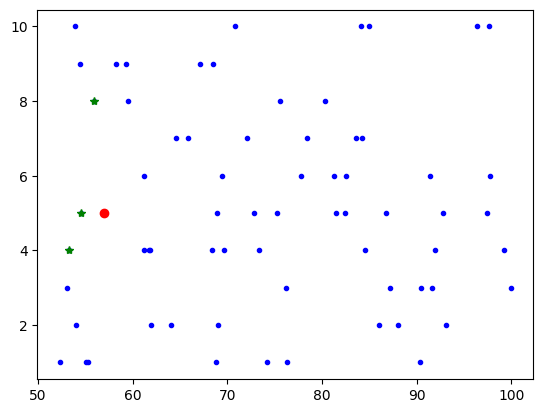

Классы, соответствующие К ближайшим соседям:
класс=A, количество элементов=1
класс=C, количество элементов=1
класс=D, количество элементов=1

**************************************
Проверяемая точка:  [84.83, 3.0]
**************************************
Вывод отсортированного списка соседей:
X1=84.53, X2=4.0, y=D, расстояние=1.04
X1=86.07, X2=2.0, y=D, расстояние=1.59
X1=87.19, X2=3.0, y=C, расстояние=2.36
X1=86.77, X2=5.0, y=C, расстояние=2.79
X1=82.41, X2=5.0, y=B, расстояние=3.14
X1=88.0, X2=2.0, y=B, расстояние=3.32
X1=82.49, X2=6.0, y=B, расстояние=3.80
X1=81.53, X2=5.0, y=A, расстояние=3.86
X1=84.27, X2=7.0, y=C, расстояние=4.04
X1=83.61, X2=7.0, y=C, расстояние=4.18
X1=81.24, X2=6.0, y=D, расстояние=4.68
X1=90.48, X2=3.0, y=A, расстояние=5.65
X1=90.36, X2=1.0, y=A, расстояние=5.88
X1=80.37, X2=8.0, y=D, расстояние=6.70
X1=91.62, X2=3.0, y=B, расстояние=6.79
X1=84.95, X2=10.0, y=A, расстояние=7.00
X1=84.13, X2=10.0, y=B, расстояние=7.03
X1=91.97, X2=4.0, y=D, расстояние=7.21
X1=91

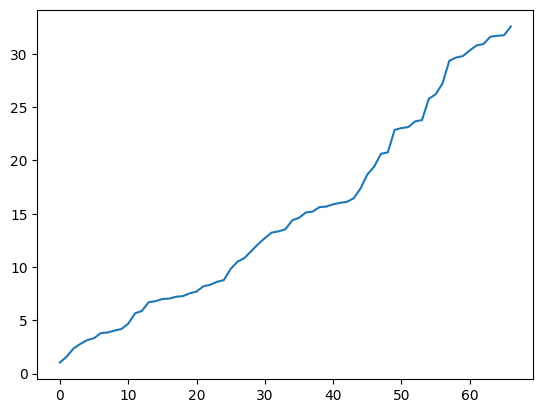

Вывод К ближайших соседей:
X1=84.53, X2=4.0, y=D, расстояние=1.04
X1=86.07, X2=2.0, y=D, расстояние=1.59
X1=87.19, X2=3.0, y=C, расстояние=2.36

Визуализация К ближайших соседей:


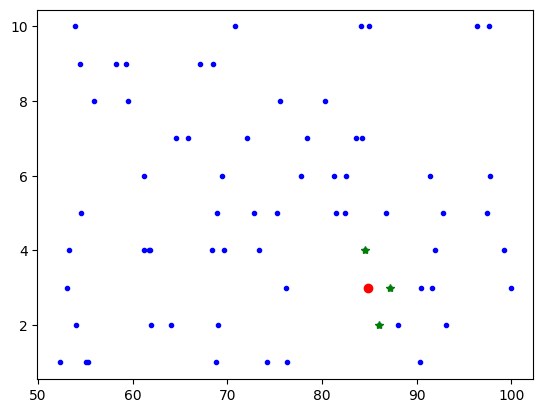

Классы, соответствующие К ближайшим соседям:
класс=D, количество элементов=2
класс=C, количество элементов=1

**************************************
Проверяемая точка:  [80.66, 7.0]
**************************************
Вывод отсортированного списка соседей:
X1=80.37, X2=8.0, y=D, расстояние=1.04
X1=81.24, X2=6.0, y=D, расстояние=1.16
X1=82.49, X2=6.0, y=B, расстояние=2.09
X1=81.53, X2=5.0, y=A, расстояние=2.18
X1=78.45, X2=7.0, y=A, расстояние=2.21
X1=82.41, X2=5.0, y=B, расстояние=2.66
X1=83.61, X2=7.0, y=C, расстояние=2.95
X1=77.74, X2=6.0, y=C, расстояние=3.09
X1=84.27, X2=7.0, y=C, расстояние=3.61
X1=84.13, X2=10.0, y=B, расстояние=4.59
X1=84.53, X2=4.0, y=D, расстояние=4.90
X1=75.6, X2=8.0, y=B, расстояние=5.16
X1=84.95, X2=10.0, y=A, расстояние=5.23
X1=75.21, X2=5.0, y=A, расстояние=5.81
X1=76.22, X2=3.0, y=A, расстояние=5.98
X1=86.77, X2=5.0, y=C, расстояние=6.43
X1=86.07, X2=2.0, y=D, расстояние=7.37
X1=76.29, X2=1.0, y=B, расстояние=7.42
X1=87.19, X2=3.0, y=C, расстояние=7.6

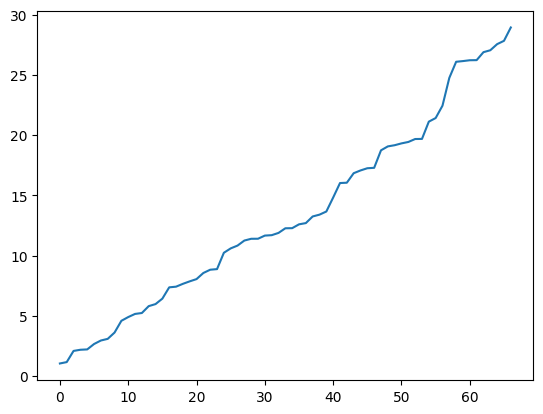

Вывод К ближайших соседей:
X1=80.37, X2=8.0, y=D, расстояние=1.04
X1=81.24, X2=6.0, y=D, расстояние=1.16
X1=82.49, X2=6.0, y=B, расстояние=2.09

Визуализация К ближайших соседей:


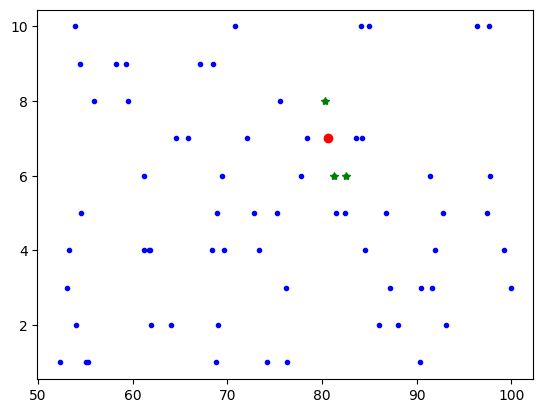

Классы, соответствующие К ближайшим соседям:
класс=D, количество элементов=2
класс=B, количество элементов=1

**************************************
Проверяемая точка:  [63.09, 7.0]
**************************************
Вывод отсортированного списка соседей:
X1=64.6, X2=7.0, y=B, расстояние=1.51
X1=61.24, X2=6.0, y=A, расстояние=2.10
X1=65.83, X2=7.0, y=D, расстояние=2.74
X1=61.82, X2=4.0, y=A, расстояние=3.26
X1=61.72, X2=4.0, y=A, расстояние=3.30
X1=61.19, X2=4.0, y=B, расстояние=3.55
X1=59.55, X2=8.0, y=B, расстояние=3.68
X1=59.32, X2=9.0, y=B, расстояние=4.27
X1=67.14, X2=9.0, y=A, расстояние=4.52
X1=64.1, X2=2.0, y=C, расстояние=5.10
X1=61.99, X2=2.0, y=A, расстояние=5.12
X1=58.29, X2=9.0, y=D, расстояние=5.20
X1=68.54, X2=9.0, y=A, расстояние=5.81
X1=68.42, X2=4.0, y=C, расстояние=6.12
X1=68.94, X2=5.0, y=A, расстояние=6.18
X1=69.45, X2=6.0, y=D, расстояние=6.44
X1=69.66, X2=4.0, y=A, расстояние=7.22
X1=55.91, X2=8.0, y=A, расстояние=7.25
X1=68.98, X2=2.0, y=D, расстояние=7.73
X

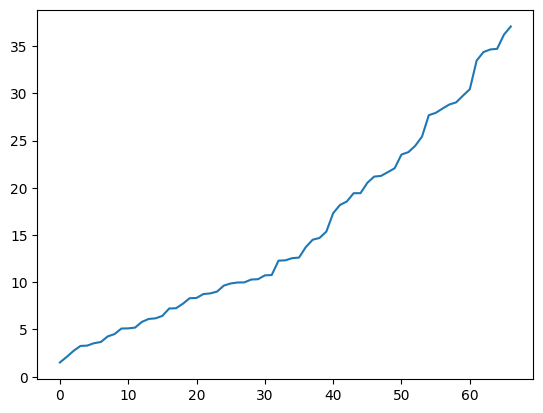

Вывод К ближайших соседей:
X1=64.6, X2=7.0, y=B, расстояние=1.51
X1=61.24, X2=6.0, y=A, расстояние=2.10
X1=65.83, X2=7.0, y=D, расстояние=2.74

Визуализация К ближайших соседей:


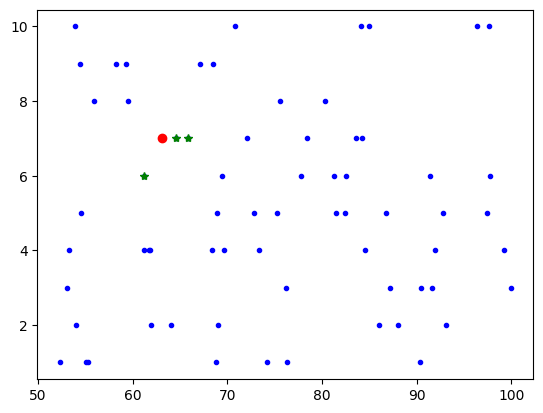

Классы, соответствующие К ближайшим соседям:
класс=A, количество элементов=1
класс=B, количество элементов=1
класс=D, количество элементов=1


['A',
 'B',
 'A',
 'D',
 'A',
 'B',
 'A',
 'C',
 'C',
 'A',
 'A',
 'C',
 'A',
 'A',
 'A',
 'B',
 'D',
 'A',
 'B',
 'A',
 'D',
 'D',
 'A']

In [56]:
# Для всех объектов тестовой выборки (классификация)
simple_knn_clas_prediction = simple_knn_clas.predict(K=3, \
                          prediction_type=PredictionType.CLASSIFICATION, \
                          X_test=data_test[['Attendance (%)','Stress_Level (1-10)']])
simple_knn_clas_prediction

## [Использование классов scikit-learn](https://scikit-learn.org/stable/modules/neighbors.html)

- [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) - для решения задачи регрессии
- [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) - для решения задачи классификации

Также существуют разновидности алгоритма, рассматривающие ближайших соседей в рамках некоторой окрестности (радиуса):
- [RadiusNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsRegressor.html)
- [RadiusNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html)

In [57]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

### Классификация

In [58]:
KNeighborsClassifierObj = KNeighborsClassifier(n_neighbors=3)
KNeighborsClassifierObj

KNeighborsClassifier(n_neighbors=3)

In [59]:
KNeighborsClassifierObj.fit(data_train[['Attendance (%)','Stress_Level (1-10)']], data_train['y_clas'])
KNeighborsClassifierObj.predict(data_test[['Attendance (%)','Stress_Level (1-10)']])

array(['A', 'B', 'A', 'D', 'A', 'B', 'A', 'C', 'C', 'A', 'A', 'C', 'A',
       'A', 'A', 'B', 'D', 'A', 'B', 'A', 'D', 'D', 'A'], dtype=object)

In [60]:
simple_knn_clas = SimpleKNN()
simple_knn_clas.fit(data_train[['Attendance (%)','Stress_Level (1-10)']], data_train['y_clas'])
simple_knn_clas_prediction = simple_knn_clas.predict(K=3, \
                          prediction_type=PredictionType.CLASSIFICATION, \
                          X_test=data_test[['Attendance (%)','Stress_Level (1-10)']], verbose = False)
np.array(simple_knn_clas_prediction)

array(['A', 'B', 'A', 'D', 'A', 'B', 'A', 'C', 'C', 'A', 'A', 'C', 'A',
       'A', 'A', 'B', 'D', 'A', 'B', 'A', 'D', 'D', 'A'], dtype='<U1')

### Регрессия

In [61]:
KNeighborsRegressorObj = KNeighborsRegressor()
KNeighborsRegressorObj

KNeighborsRegressor()

In [62]:
KNeighborsRegressorObj.fit(data_train[['Attendance (%)','Stress_Level (1-10)']], data_train['Final_Score'])
KNeighborsRegressorObj.predict(data_test[['Attendance (%)','Stress_Level (1-10)']])

array([79.198, 67.846, 69.164, 71.966, 72.598, 64.34 , 79.032, 63.616,
       64.258, 74.312, 66.358, 60.364, 65.104, 67.418, 74.664, 68.3  ,
       60.712, 62.222, 61.27 , 61.766, 53.404, 71.966, 76.04 ])

In [63]:
simple_knn_regr = SimpleKNN()
simple_knn_regr.fit(data_train[['Attendance (%)','Stress_Level (1-10)']], data_train['Final_Score'])
simple_knn_regr_prediction = simple_knn_regr.predict(K=5, \
                          prediction_type=PredictionType.REGRESSION, \
                          X_test=data_test[['Attendance (%)','Stress_Level (1-10)']], verbose = False)
np.array(simple_knn_regr_prediction)

array([79.198, 67.846, 69.164, 71.966, 72.598, 64.34 , 79.032, 63.616,
       64.258, 74.312, 66.358, 60.364, 65.104, 67.418, 74.664, 68.3  ,
       60.712, 62.222, 61.27 , 61.766, 53.404, 71.966, 76.04 ])

## Достоинства и недостатки

### Достоинства 
- Простота и универсальность метода.
- Возможность использования для классификации и регрессии.
- Возможность использования для обучения без учителя.

### Недостатки
- Метод в целом считается не очень точным.
- Зависимость от гиперпараметра K.
- При большом количестве точек перебор и вычисление расстояния занимают много времени. Для этого используются различные методы ускорения алгоритма - https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms, в частности [KDTree](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html) и [BallTree](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html).
- Статья, посвященная алгоритму [BallTree.](http://people.ee.duke.edu/~lcarin/liu06a.pdf)

## Особенности алгоритма

### Обучение без учителя
Поскольку метод фактически не строит модель $M$ и для поиска ближайших соседей использует только меру близости между $X^{train}$ и $X^{test}$, то в некоторых случаях $Y^{train}$ игнорируют, и метод k-NN рассматривают как один из методов обучения без учителя. В этом случае k-NN можно рассматривать как специфическую разновидность алгоритма кластеризации - http://scikit-learn.org/stable/modules/neighbors.html

### Масштабирование признаков
Если признаки лежат в различных диапазонах, то необходимо их масштабировать с использованием MinMax масштабирования или масштабирования на основе Z-оценки.